In this notebook, I analyse the distribution of labels per domains and compare them.

In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from statistics import multimode
from apyori import apriori


In [2]:
# Open the file
corpus = pd.read_csv("MaCoCu-mk_with_predictions.csv",index_col=0, sep="\t")
corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,...,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence
0,gg.mk,https://gg.mk/,"Тоа е тоа, екипа. Претпоследната епизода ја на...","<doc id=""macocu.mk.4"" title=""GG.MK - е-спорт &...",864,A17 (review),"{7: 0.0152, 8: 0.1352, 0: 0.0334, 1: 0.0402, 6...",0.643622,List of Summaries/Excerpts,"{'Forum': 0.0036, 'News/Reporting': 0.0147, 'O...",...,0.861316,Promotion,"{'Promotion': 0.526, 'Opinion/Argumentation': ...",0.525988,Opinion/Argumentation,"{'Other': 0.0953, 'Information/Explanation': 0...",0.419943,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998700
1,qs.mk,https://www.qs.mk/,"Парадата на гордоста се враќа под слоганот ""Во...","<doc id=""macocu.mk.5"" title=""КВИР СКВЕР Скопје...",1054,A12 (promotion),"{7: 0.0056, 8: 0.0162, 0: 0.0263, 1: 0.0047, 6...",0.904037,List of Summaries/Excerpts,"{'Forum': 0.0037, 'News/Reporting': 0.0111, 'O...",...,0.990890,Promotion,"{'Promotion': 0.9479, 'Opinion/Argumentation':...",0.947886,News,"{'Other': 0.1212, 'Information/Explanation': 0...",0.533915,Promotion,"{'Other': 0.0004, 'Information/Explanation': 0...",0.998806


In [3]:
# Show all columns
pd.set_option('display.max_columns', None)

In [4]:
corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence
0,gg.mk,https://gg.mk/,"Тоа е тоа, екипа. Претпоследната епизода ја на...","<doc id=""macocu.mk.4"" title=""GG.MK - е-спорт &...",864,A17 (review),"{7: 0.0152, 8: 0.1352, 0: 0.0334, 1: 0.0402, 6...",0.643622,List of Summaries/Excerpts,"{'Forum': 0.0036, 'News/Reporting': 0.0147, 'O...",0.919893,Opinion,"{'Interactive Discussion': 0.0085, 'Narrative'...",0.541413,Opinion/Argumentation,"{'Information/Explanation': 0.0055, 'Opinion/A...",0.861316,Promotion,"{'Promotion': 0.526, 'Opinion/Argumentation': ...",0.525988,Opinion/Argumentation,"{'Other': 0.0953, 'Information/Explanation': 0...",0.419943,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998700
1,qs.mk,https://www.qs.mk/,"Парадата на гордоста се враќа под слоганот ""Во...","<doc id=""macocu.mk.5"" title=""КВИР СКВЕР Скопје...",1054,A12 (promotion),"{7: 0.0056, 8: 0.0162, 0: 0.0263, 1: 0.0047, 6...",0.904037,List of Summaries/Excerpts,"{'Forum': 0.0037, 'News/Reporting': 0.0111, 'O...",0.780482,Informational Description/Explanation,"{'Interactive Discussion': 0.001, 'Narrative':...",0.950632,Promotion,"{'Information/Explanation': 0.0014, 'Opinion/A...",0.990890,Promotion,"{'Promotion': 0.9479, 'Opinion/Argumentation':...",0.947886,News,"{'Other': 0.1212, 'Information/Explanation': 0...",0.533915,Promotion,"{'Other': 0.0004, 'Information/Explanation': 0...",0.998806


In [5]:
corpus.columns

Index(['domain', 'url', 'text', 'doc', 'length', 'FTD',
       'FTD_label_distribution', 'FTD_confidence', 'GINCO',
       'GINCO_label_distribution', 'GINCO_confidence', 'CORE',
       'CORE_label_distribution', 'CORE_confidence', 'GINCO-X-GENRE',
       'GINCO-X-GENRE_label_distribution', 'GINCO-X-GENRE_confidence',
       'FTD-X-GENRE', 'FTD-X-GENRE_label_distribution',
       'FTD-X-GENRE_confidence', 'CORE-X-GENRE',
       'CORE-X-GENRE_label_distribution', 'CORE-X-GENRE_confidence', 'X-GENRE',
       'X-GENRE_label_distribution', 'X-GENRE_confidence'],
      dtype='object')

In [6]:
classifiers = ["FTD", "GINCO", "CORE", "GINCO-X-GENRE", "FTD-X-GENRE", "CORE-X-GENRE", "X-GENRE"]

## General analysis

### Label confidence per classifier

In [7]:
# Analyse label confidence per classifier
min_confidence = []
max_confidence = []
median_confidence = []

for i in classifiers:
	min_confidence.append(round(corpus[f"{i}_confidence"].min(),2))
	max_confidence.append(round(corpus[f"{i}_confidence"].max(),2))
	median_confidence.append(round(corpus[f"{i}_confidence"].median(),2))

# Confidence dataframe
confidence = pd.DataFrame({"classifier": classifiers, "min": min_confidence, "median": median_confidence, "max": max_confidence})

confidence = confidence.sort_values(by="median", ascending=False)
print(confidence.to_markdown(index=False))

| classifier    |   min |   median |   max |
|:--------------|------:|---------:|------:|
| X-GENRE       |  0.32 |     1    |  1    |
| GINCO-X-GENRE |  0.28 |     0.98 |  0.99 |
| GINCO         |  0.24 |     0.95 |  0.98 |
| CORE          |  0.24 |     0.91 |  0.99 |
| FTD-X-GENRE   |  0.22 |     0.83 |  0.97 |
| FTD           |  0.16 |     0.77 |  0.96 |
| CORE-X-GENRE  |  0.15 |     0.64 |  0.95 |


### Most frequent values per classifier

In [8]:
# Compare most frequent values
most_frequent = []
frequency = []

for i in classifiers:
	most_frequent.append(corpus[f"{i}"].mode()[0])
	frequency.append(round(corpus[f"{i}"].value_counts(normalize=True)[0],2))

most_frequent_comparison = pd.DataFrame({"classifier": classifiers, "most frequent label": most_frequent, "frequency": frequency})

print(most_frequent_comparison.to_markdown(index=False))

| classifier    | most frequent label                   |   frequency |
|:--------------|:--------------------------------------|------------:|
| FTD           | A12 (promotion)                       |        0.42 |
| GINCO         | News/Reporting                        |        0.31 |
| CORE          | Informational Description/Explanation |        0.58 |
| GINCO-X-GENRE | News                                  |        0.31 |
| FTD-X-GENRE   | Promotion                             |        0.44 |
| CORE-X-GENRE  | Information/Explanation               |        0.36 |
| X-GENRE       | News                                  |        0.34 |


### Label distribution per classifier

In [9]:
list(zip(list(corpus[f"FTD"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"FTD"].value_counts(normalize=True).to_dict().values())]))

[('A12 (promotion)', 0.42),
 ('A8 (news)', 0.2),
 ('A1 (argumentative)', 0.13),
 ('A16 (information)', 0.12),
 ('A7 (instruction)', 0.04),
 ('A17 (review)', 0.04),
 ('A9 (legal)', 0.02),
 ('A11 (personal)', 0.01),
 ('A14 (academic)', 0.01),
 ('A4 (fiction)', 0.0)]

In [10]:
# Create a dataframe with label distribution per classifier

def label_distribution(column, corpus):
	new_df = pd.DataFrame({f"label_distribution_{column}": list(zip(list(corpus[f"{column}"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"{column}"].value_counts(normalize=True).to_dict().values())]))})
	return new_df

# Add other columns
for i in classifiers:
	new_df = label_distribution(i, corpus)
	print(new_df.to_markdown(index=False))



| label_distribution_FTD       |
|:-----------------------------|
| ('A12 (promotion)', 0.42)    |
| ('A8 (news)', 0.2)           |
| ('A1 (argumentative)', 0.13) |
| ('A16 (information)', 0.12)  |
| ('A7 (instruction)', 0.04)   |
| ('A17 (review)', 0.04)       |
| ('A9 (legal)', 0.02)         |
| ('A11 (personal)', 0.01)     |
| ('A14 (academic)', 0.01)     |
| ('A4 (fiction)', 0.0)        |
| label_distribution_GINCO             |
|:-------------------------------------|
| ('News/Reporting', 0.31)             |
| ('Promotion', 0.24)                  |
| ('Information/Explanation', 0.18)    |
| ('List of Summaries/Excerpts', 0.08) |
| ('Opinion/Argumentation', 0.08)      |
| ('Instruction', 0.05)                |
| ('Other', 0.03)                      |
| ('Forum', 0.01)                      |
| ('Legal/Regulation', 0.01)           |
| label_distribution_CORE                         |
|:------------------------------------------------|
| ('Informational Description/Explanation', 0.58)

## Analysis of labels per domains

In [11]:
# Create a dataframe to analyse the distribution of instance-level labels in domains

def genre_analysis(genre_column):
	corpus_analysis_dict = corpus.reset_index().groupby("domain")[genre_column].apply(list).to_dict()
	corpus_analysis_series = pd.Series(list(corpus_analysis_dict.values()), index = list(corpus_analysis_dict.keys()))

	df_items = list(corpus_analysis_dict.values())

	corpus_analysis_df = pd.DataFrame({"domain_id": corpus_analysis_series.index, f"genres-in-domain-{genre_column}": [dict(Counter(x)) for x in df_items]})
	return corpus_analysis_df


# Create a first dataframe
genre_distribution = genre_analysis(classifiers[0])

# Create dataframes for all other labels and append them to the first dataframe
for i in classifiers[1:]:
	new_df = genre_analysis(i)
	genre_distribution = pd.merge(genre_distribution, new_df, how= "left", on= "domain_id", suffixes = ["", ""])

genre_distribution.head(2)


,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE
0,101foot.mk,"{'A12 (promotion)': 3, 'A16 (information)': 7}","{'Promotion': 1, 'Information/Explanation': 8,...","{'Informational Description/Explanation': 9, '...","{'Promotion': 2, 'Information/Explanation': 7,...","{'Promotion': 1, 'Information/Explanation': 8,...","{'Information/Explanation': 5, 'Instruction': 5}","{'Promotion': 1, 'Information/Explanation': 2,..."
1,2020.iffs.mk,"{'A12 (promotion)': 2, 'A1 (argumentative)': 3...","{'News/Reporting': 3, 'List of Summaries/Excer...","{'Informational Description/Explanation': 9, '...","{'Promotion': 3, 'News': 3, 'Instruction': 1, ...","{'Promotion': 8, 'Instruction': 1, 'News': 1}","{'Opinion/Argumentation': 4, 'News': 5, 'Instr...","{'Other': 1, 'News': 3, 'Instruction': 1, 'Opi..."


In [12]:
# Add the frequency of the most common label (per domain)

for i in classifiers:
	label_count_list = list(genre_distribution[f"genres-in-domain-{i}"])
	most_common_label_frequency = []

	for element in label_count_list:
		# Frequency of the most frequent label
		biggest_number = max(list(element.values()))

		most_common_label_frequency.append(biggest_number)

	genre_distribution[f"biggest-label-frequency-{i}"] = most_common_label_frequency

genre_distribution.head(2)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE
0,101foot.mk,"{'A12 (promotion)': 3, 'A16 (information)': 7}","{'Promotion': 1, 'Information/Explanation': 8,...","{'Informational Description/Explanation': 9, '...","{'Promotion': 2, 'Information/Explanation': 7,...","{'Promotion': 1, 'Information/Explanation': 8,...","{'Information/Explanation': 5, 'Instruction': 5}","{'Promotion': 1, 'Information/Explanation': 2,...",7,8,9,7,8,5,7
1,2020.iffs.mk,"{'A12 (promotion)': 2, 'A1 (argumentative)': 3...","{'News/Reporting': 3, 'List of Summaries/Excer...","{'Informational Description/Explanation': 9, '...","{'Promotion': 3, 'News': 3, 'Instruction': 1, ...","{'Promotion': 8, 'Instruction': 1, 'News': 1}","{'Opinion/Argumentation': 4, 'News': 5, 'Instr...","{'Other': 1, 'News': 3, 'Instruction': 1, 'Opi...",4,3,9,3,8,5,3


###  The process of calculating the most common label explained

Here, I go through the process step by step.

In [13]:
# Create a list from the values of the column on biggest label frequency
counts_list = genre_distribution["biggest-label-frequency-X-GENRE"].to_list()

# Create a list from the values of the column on the genre distribution
label_distribution_list = genre_distribution["genres-in-domain-X-GENRE"].to_list()

print("Counts list:")
print(counts_list[:4])
print("Label distribution list:")
print(label_distribution_list[:4])

# Create a list of items from the dictionary values
label_distribution_list_items = [list(x.items()) for x in label_distribution_list]

print("Label distribution dict turned into pairs of labels and values:")
print(label_distribution_list_items[:4])

# Merge the list of items with the biggest frequency list

merged_list = list(zip(counts_list, label_distribution_list_items))

print("Merged list of the items in the dictionary and the count of the most frequent label")
print(merged_list[:4])


Counts list:
[7, 3, 7, 10]
Label distribution list:
[{'Promotion': 1, 'Information/Explanation': 2, 'Instruction': 7}, {'Other': 1, 'News': 3, 'Instruction': 1, 'Opinion/Argumentation': 3, 'Information/Explanation': 1, 'Promotion': 1}, {'Promotion': 7, 'Instruction': 1, 'Information/Explanation': 2}, {'News': 10}]
Label distribution dict turned into pairs of labels and values:
[[('Promotion', 1), ('Information/Explanation', 2), ('Instruction', 7)], [('Other', 1), ('News', 3), ('Instruction', 1), ('Opinion/Argumentation', 3), ('Information/Explanation', 1), ('Promotion', 1)], [('Promotion', 7), ('Instruction', 1), ('Information/Explanation', 2)], [('News', 10)]]
Merged list of the items in the dictionary and the count of the most frequent label
[(7, [('Promotion', 1), ('Information/Explanation', 2), ('Instruction', 7)]), (3, [('Other', 1), ('News', 3), ('Instruction', 1), ('Opinion/Argumentation', 3), ('Information/Explanation', 1), ('Promotion', 1)]), (7, [('Promotion', 7), ('Instructi

In [14]:
# From this merged list, create a list of all labels that match the biggest frequency value per domain
frequent_label_list = []

for merged_element in merged_list:
	# Create a list for each row
	current_most_frequent = []
	# Go through the pairs of labels and their frequency which are in a list in the index 1 of the merged element
	for label_info in merged_element[1]:
		# Compare the frequency of each label with the biggest frequency value (which is in the index 0 of the merged element) - if they are the same, append the label to the list of most frequent labels
		if label_info[1] == merged_element[0]:
			current_most_frequent.append(label_info[0])
	# Append the list of most frequent labels to the global list (for all values)
	frequent_label_list.append(current_most_frequent)

print(frequent_label_list[:4])

[['Instruction'], ['News', 'Opinion/Argumentation'], ['Promotion'], ['News']]


In [15]:
# As we can see, this allows us to catch also values that are tied at the first spot
# Let's create a list of most frequent labels and information whether there was a tie and add them to the dataframe
tie_list = []
most_frequent_label_list = []

for element in frequent_label_list:
	# If there is more than 1 element at the first spot, add to the "tie" list "yes" and randomly choose from the elements which element is added to the most frequent label list
	if len(element) > 1:
		tie_list.append("yes")
		most_frequent_label_list.append(random.choice(element))
	else:
		tie_list.append("no")
		most_frequent_label_list.append(element[0])

print(tie_list[:4])
print(most_frequent_label_list[:4])

['no', 'yes', 'no', 'no']
['Instruction', 'News', 'Promotion', 'News']


### Final code for adding information on the most frequent label

In [16]:
for classifier in classifiers:
	# Create a list from the values of the column on biggest label frequency
	counts_list = genre_distribution[F"biggest-label-frequency-{classifier}"].to_list()

	# Create a list from the values of the column on the genre distribution
	label_distribution_list = genre_distribution[f"genres-in-domain-{classifier}"].to_list()

	# Create a list of items from the dictionary values
	label_distribution_list_items = [list(x.items()) for x in label_distribution_list]

	# Merge the list of items with the biggest frequency list
	merged_list = list(zip(counts_list, label_distribution_list_items))

	# From this merged list, create a list of all labels that match the biggest frequency value per domain
	frequent_label_list = []

	for merged_element in merged_list:
		# Create a list for each row
		current_most_frequent = []
		# Go through the pairs of labels and their frequency which are in a list in the index 1 of the merged element
		for label_info in merged_element[1]:
			# Compare the frequency of each label with the biggest frequency value (which is in the index 0 of the merged element) - if they are the same, append the label to the list of most frequent labels
			if label_info[1] == merged_element[0]:
				current_most_frequent.append(label_info[0])
		# Append the list of most frequent labels to the global list (for all values)
		frequent_label_list.append(current_most_frequent)

	# Let's create a list of most frequent labels and information whether there was a tie and add them to the dataframe
	tie_list = []
	most_frequent_label_list = []

	for element in frequent_label_list:
		# If there is more than 1 element at the first spot, add to the "tie" list "yes" and randomly choose from the elements which element is added to the most frequent label list
		if len(element) > 1:
			tie_list.append("yes")
			most_frequent_label_list.append(random.choice(element))
		else:
			tie_list.append("no")
			most_frequent_label_list.append(element[0])

	# Add the lists to the dataframe
	genre_distribution[f"most_frequent_label_{classifier}"] = most_frequent_label_list
	genre_distribution[f"tie-{classifier}"] = tie_list

genre_distribution.head(2)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,101foot.mk,"{'A12 (promotion)': 3, 'A16 (information)': 7}","{'Promotion': 1, 'Information/Explanation': 8,...","{'Informational Description/Explanation': 9, '...","{'Promotion': 2, 'Information/Explanation': 7,...","{'Promotion': 1, 'Information/Explanation': 8,...","{'Information/Explanation': 5, 'Instruction': 5}","{'Promotion': 1, 'Information/Explanation': 2,...",7,8,9,7,8,5,7,A16 (information),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Information/Explanation,no,Information/Explanation,yes,Instruction,no
1,2020.iffs.mk,"{'A12 (promotion)': 2, 'A1 (argumentative)': 3...","{'News/Reporting': 3, 'List of Summaries/Excer...","{'Informational Description/Explanation': 9, '...","{'Promotion': 3, 'News': 3, 'Instruction': 1, ...","{'Promotion': 8, 'Instruction': 1, 'News': 1}","{'Opinion/Argumentation': 4, 'News': 5, 'Instr...","{'Other': 1, 'News': 3, 'Instruction': 1, 'Opi...",4,3,9,3,8,5,3,A17 (review),no,News/Reporting,no,Informational Description/Explanation,no,Promotion,yes,Promotion,no,News,no,Opinion/Argumentation,yes


In [17]:
# Test if everything is okay
genre_distribution[genre_distribution["tie-CORE"] == "yes"][["genres-in-domain-CORE","biggest-label-frequency-CORE", "most_frequent_label_CORE"]]

,genres-in-domain-CORE,biggest-label-frequency-CORE,most_frequent_label_CORE
9,"{'Informational Description/Explanation': 5, '...",5,Informational Description/Explanation
50,"{'Informational Description/Explanation': 5, '...",5,Informational Description/Explanation
86,"{'Narrative': 4, 'Informational Description/Ex...",4,Narrative
98,"{'Informational Description/Explanation': 5, '...",5,Informational Persuasion
102,"{'Informational Description/Explanation': 5, '...",5,Informational Description/Explanation
113,"{'Informational Description/Explanation': 3, '...",3,Informational Description/Explanation
114,"{'Informational Persuasion': 3, 'Informational...",3,Informational Persuasion
141,"{'Informational Description/Explanation': 5, '...",5,Informational Description/Explanation
146,"{'Informational Description/Explanation': 5, '...",5,Narrative
161,"{'Informational Description/Explanation': 4, '...",4,Informational Persuasion


In [18]:
genre_distribution.head(1)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,101foot.mk,"{'A12 (promotion)': 3, 'A16 (information)': 7}","{'Promotion': 1, 'Information/Explanation': 8,...","{'Informational Description/Explanation': 9, '...","{'Promotion': 2, 'Information/Explanation': 7,...","{'Promotion': 1, 'Information/Explanation': 8,...","{'Information/Explanation': 5, 'Instruction': 5}","{'Promotion': 1, 'Information/Explanation': 2,...",7,8,9,7,8,5,7,A16 (information),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Information/Explanation,no,Information/Explanation,yes,Instruction,no


In [19]:
# Save the dataframe
genre_distribution.to_csv("MaCoCu-mk-with-predictions-genre-distribution-in-domains.csv", sep="\t")

In [20]:
# Merge based on the url
extended_corpus = pd.merge(left = corpus, right = genre_distribution, how = "left", left_on= "domain", right_on= "domain_id", suffixes=["",""])


In [21]:
extended_corpus.describe(include="all")

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
count,10000,10000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,1000,10000,10000,10000,NaN,10,10000,NaN,9,10000,NaN,8,10000,NaN,9,9986,NaN,7,10000,NaN,7,10000,NaN,9,4619,NaN,1000,549,627,262,535,338,452,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,9,2,8,2,8,2,7,2,7,2,9,2
top,gg.mk,https://gg.mk/,"Тоа е тоа, екипа. Претпоследната епизода ја на...","<doc id=""macocu.mk.4"" title=""GG.MK - е-спорт &...",NaN,A12 (promotion),"{7: 0.0152, 8: 0.1352, 0: 0.0334, 1: 0.0402, 6...",NaN,News/Reporting,"{'Forum': 0.0036, 'News/Reporting': 0.0147, 'O...",NaN,Informational Description/Explanation,"{'Interactive Discussion': 0.0085, 'Narrative'...",NaN,News,"{'Information/Explanation': 0.0015, 'Opinion/A...",NaN,Promotion,"{'Promotion': 0.526, 'Opinion/Argumentation': ...",NaN,Information/Explanation,"{'Other': 0.0953, 'Information/Explanation': 0...",NaN,News,"{'Other': 0.0001, 'Information/Explanation': 0...",NaN,gg.mk,{'A12 (promotion)': 10},{'News/Reporting': 10},{'Informational Description/Explanation': 10},{'News': 10},{'Promotion': 10},{'News': 10},{'News': 10},NaN,NaN,NaN,NaN,NaN,NaN,NaN,A12 (promotion),no,News/Reporting,no,Informational Description/Explanation,no,News,no,Promotion,no,Information/Explanation,no,News,no
freq,10,1,1,1,NaN,4226,1,NaN,3136,1,NaN,5809,1,NaN,3051,2,NaN,4376,1,NaN,3621,1,NaN,3420,791,NaN,10,960,330,1850,360,950,680,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4960,9330,4090,9300,6320,9430,3790,9310,4780,9310,4130,9160,4100,9380
mean,NaN,NaN,NaN,NaN,407.222600,NaN,NaN,0.707988,NaN,NaN,0.863806,NaN,NaN,0.828029,NaN,NaN,0.920332,NaN,NaN,0.773138,NaN,NaN,0.615557,NaN,NaN,0.974817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7640,6.472000,7.657000,6.552000,7.115000,6.697000,6.803000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,867.246509,NaN,NaN,0.213832,NaN,NaN,0.159970,NaN,NaN,0.175943,NaN,NaN,0.136157,NaN,NaN,0.182064,NaN,NaN,0.239739,NaN,NaN,0.081538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0796,2.029687,1.912516,1.983857,1.983474,2.025735,2.011615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,76.000000,NaN,NaN,0.162058,NaN,NaN,0.238891,NaN,NaN,0.240957,NaN,NaN,0.277827,NaN,NaN,0.220517,NaN,NaN,0.147283,NaN,NaN,0.324877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,128.000000,NaN,NaN,0.527706,NaN,NaN,0.840060,NaN,NaN,0.711767,NaN,NaN,0.937103,NaN,NaN,0.641003,NaN,NaN,0.393718,N

In [22]:
extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,gg.mk,https://gg.mk/,"Тоа е тоа, екипа. Претпоследната епизода ја на...","<doc id=""macocu.mk.4"" title=""GG.MK - е-спорт &...",864,A17 (review),"{7: 0.0152, 8: 0.1352, 0: 0.0334, 1: 0.0402, 6...",0.643622,List of Summaries/Excerpts,"{'Forum': 0.0036, 'News/Reporting': 0.0147, 'O...",0.919893,Opinion,"{'Interactive Discussion': 0.0085, 'Narrative'...",0.541413,Opinion/Argumentation,"{'Information/Explanation': 0.0055, 'Opinion/A...",0.861316,Promotion,"{'Promotion': 0.526, 'Opinion/Argumentation': ...",0.525988,Opinion/Argumentation,"{'Other': 0.0953, 'Information/Explanation': 0...",0.419943,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998700,gg.mk,"{'A17 (review)': 6, 'A12 (promotion)': 3, 'A7 ...","{'List of Summaries/Excerpts': 3, 'News/Report...","{'Opinion': 1, 'Informational Description/Expl...","{'Opinion/Argumentation': 2, 'Promotion': 3, '...","{'Promotion': 6, 'News': 3, 'Instruction': 1}","{'Opinion/Argumentation': 2, 'Other': 2, 'News...","{'Opinion/Argumentation': 3, 'Instruction': 1,...",6,3,6,3,6,6,4,A17 (review),no,News/Reporting,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,News,no,News,no
1,qs.mk,https://www.qs.mk/,"Парадата на гордоста се враќа под слоганот ""Во...","<doc id=""macocu.mk.5"" title=""КВИР СКВЕР Скопје...",1054,A12 (promotion),"{7: 0.0056, 8: 0.0162, 0: 0.0263, 1: 0.0047, 6...",0.904037,List of Summaries/Excerpts,"{'Forum': 0.0037, 'News/Reporting': 0.0111, 'O...",0.780482,Informational Description/Explanation,"{'Interactive Discussion': 0.001, 'Narrative':...",0.950632,Promotion,"{'Information/Explanation': 0.0014, 'Opinion/A...",0.990890,Promotion,"{'Promotion': 0.9479, 'Opinion/Argumentation':...",0.947886,News,"{'Other': 0.1212, 'Information/Explanation': 0...",0.533915,Promotion,"{'Other': 0.0004, 'Information/Explanation': 0...",0.998806,qs.mk,"{'A12 (promotion)': 1, 'A17 (review)': 3, 'A1 ...","{'List of Summaries/Excerpts': 1, 'Promotion':...","{'Informational Description/Explanation': 6, '...","{'Promotion': 2, 'News': 5, 'Other': 1, 'Opini...","{'Promotion': 6, 'News': 4}","{'News': 6, 'Opinion/Argumentation': 4}","{'Promotion': 5, 'News': 4, 'Opinion/Argumenta...",6,5,6,5,6,6,5,A1 (argumentative),no,News/Reporting,no,Informational Description/Explanation,no,News,no,Promotion,no,News,no,Promotion,no


In [23]:
# Save the extended corpus
extended_corpus.to_csv("MaCoCu-mk_with_predictions.csv", sep="\t")

### Graphs based on frequency of most frequent label in the domains

In [24]:
# Create graphs based on most common label frequency

label_frequency_dict = {}

for i in classifiers:
	label_frequency_dict[i] = list(genre_distribution[f"biggest-label-frequency-{i}"])

label_frequency_dict

{'FTD': [7,
  4,
  7,
  10,
  5,
  9,
  7,
  6,
  6,
  4,
  9,
  4,
  6,
  8,
  5,
  6,
  9,
  7,
  6,
  9,
  3,
  8,
  4,
  7,
  5,
  4,
  10,
  9,
  4,
  9,
  9,
  8,
  5,
  9,
  6,
  7,
  9,
  8,
  9,
  8,
  8,
  9,
  4,
  3,
  9,
  7,
  3,
  5,
  7,
  9,
  10,
  7,
  10,
  9,
  6,
  7,
  7,
  4,
  6,
  3,
  9,
  8,
  5,
  4,
  10,
  4,
  5,
  9,
  9,
  8,
  5,
  9,
  9,
  4,
  6,
  6,
  9,
  7,
  5,
  9,
  7,
  7,
  7,
  8,
  8,
  8,
  3,
  4,
  8,
  7,
  10,
  10,
  6,
  8,
  10,
  5,
  10,
  7,
  10,
  7,
  4,
  6,
  9,
  6,
  5,
  4,
  10,
  7,
  9,
  6,
  6,
  5,
  5,
  8,
  4,
  7,
  4,
  9,
  6,
  4,
  3,
  9,
  10,
  9,
  5,
  5,
  5,
  9,
  10,
  7,
  5,
  5,
  7,
  8,
  5,
  10,
  10,
  7,
  4,
  10,
  6,
  7,
  10,
  8,
  9,
  5,
  4,
  9,
  8,
  8,
  10,
  7,
  8,
  6,
  5,
  4,
  9,
  5,
  6,
  9,
  10,
  10,
  6,
  4,
  7,
  7,
  5,
  6,
  8,
  8,
  10,
  10,
  8,
  10,
  9,
  8,
  6,
  8,
  8,
  7,
  7,
  5,
  10,
  6,
  4,
  9,
  3,
  7,
  6,
  5,
  4,
  7,
  10,
  5

#### KDE distribution plot

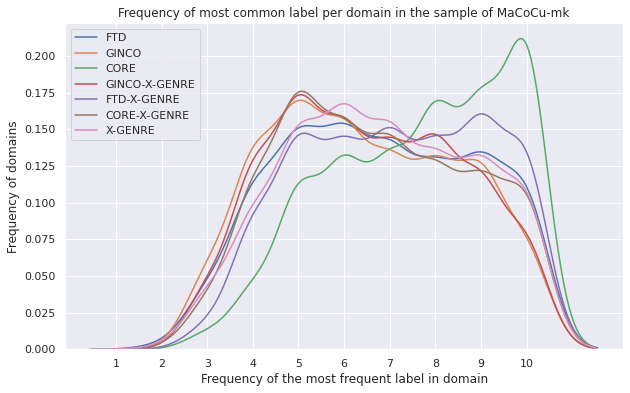

In [26]:
sns.set(rc={"figure.figsize": (10, 6)})
for classifier in classifiers:
	ax = sns.kdeplot(label_frequency_dict[classifier], x = range(10), label = f"{classifier}", bw_method = 0.25)

plt.gca().set(title='Frequency of most common label per domain in the sample of MaCoCu-mk', ylabel='Frequency of domains', xlabel="Frequency of the most frequent label in domain")
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend();


# Save the plot
fig1 = plt.gcf()
plt.show()
fig1.savefig("Comparison-of-distribution-in-domains-MaCoCu-mk-KDE.png",dpi=100)

#### Histogram with multiple bins

In [27]:
# Create a dataframe with counts of 1-10 occurences of labels in domains as rows and each classifier as columns
genre_distribution["biggest-label-frequency-FTD"].value_counts().to_dict()

def create_histogram_df(genre_column):
	histogram_dict = genre_distribution[f"biggest-label-frequency-{genre_column}"].value_counts().to_dict()
	histogram_series = pd.Series(list(histogram_dict.values()), index = list(histogram_dict.keys()))

	histogram_df = pd.DataFrame({"Occurences of label in domain": histogram_series.index, f"number-of-domains-{genre_column}": list(histogram_series)})
	return histogram_df


# Create a first dataframe
histogram_df = create_histogram_df(classifiers[0])

# Create dataframes for all other labels and append them to the first dataframe
for i in classifiers[1:]:
	new_df = create_histogram_df(i)
	histogram_df = pd.merge(histogram_df, new_df, how= "left", on= "Occurences of label in domain", suffixes = ["", ""])

histogram_df



,Occurences of label in domain,number-of-domains-FTD,number-of-domains-GINCO,number-of-domains-CORE,number-of-domains-GINCO-X-GENRE,number-of-domains-FTD-X-GENRE,number-of-domains-CORE-X-GENRE,number-of-domains-X-GENRE
0,5,154,173.0,116.0,178.0,151.0,184,156
1,6,154,156.0,131.0,155.0,141.0,153,168
2,7,142,132.0,130.0,140.0,151.0,146,154
3,9,136,132.0,169.0,121.0,162.0,120,132
4,8,127,130.0,169.0,148.0,140.0,126,133
5,10,123,78.0,230.0,82.0,146.0,117,117
6,4,117,142.0,43.0,131.0,92.0,118,97
7,3,44,57.0,12.0,45.0,17.0,35,41
8,2,3,NaN,NaN,NaN,NaN,1,2


In [28]:
# Replace NaNs with 0s
histogram_df = histogram_df.fillna(value=0)
histogram_df

,Occurences of label in domain,number-of-domains-FTD,number-of-domains-GINCO,number-of-domains-CORE,number-of-domains-GINCO-X-GENRE,number-of-domains-FTD-X-GENRE,number-of-domains-CORE-X-GENRE,number-of-domains-X-GENRE
0,5,154,173.0,116.0,178.0,151.0,184,156
1,6,154,156.0,131.0,155.0,141.0,153,168
2,7,142,132.0,130.0,140.0,151.0,146,154
3,9,136,132.0,169.0,121.0,162.0,120,132
4,8,127,130.0,169.0,148.0,140.0,126,133
5,10,123,78.0,230.0,82.0,146.0,117,117
6,4,117,142.0,43.0,131.0,92.0,118,97
7,3,44,57.0,12.0,45.0,17.0,35,41
8,2,3,0.0,0.0,0.0,0.0,1,2


In [29]:
# Change floats to integers
histogram_df["number-of-domains-CORE"] = histogram_df["number-of-domains-CORE"].astype(int)
histogram_df["number-of-domains-FTD-X-GENRE"] = histogram_df["number-of-domains-FTD-X-GENRE"].astype(int)
histogram_df["number-of-domains-GINCO"] = histogram_df["number-of-domains-GINCO"].astype(int)
histogram_df["number-of-domains-GINCO-X-GENRE"] = histogram_df["number-of-domains-GINCO-X-GENRE"].astype(int)

histogram_df

,Occurences of label in domain,number-of-domains-FTD,number-of-domains-GINCO,number-of-domains-CORE,number-of-domains-GINCO-X-GENRE,number-of-domains-FTD-X-GENRE,number-of-domains-CORE-X-GENRE,number-of-domains-X-GENRE
0,5,154,173,116,178,151,184,156
1,6,154,156,131,155,141,153,168
2,7,142,132,130,140,151,146,154
3,9,136,132,169,121,162,120,132
4,8,127,130,169,148,140,126,133
5,10,123,78,230,82,146,117,117
6,4,117,142,43,131,92,118,97
7,3,44,57,12,45,17,35,41
8,2,3,0,0,0,0,1,2


In [30]:
# Sort the histogram based on frequency
histogram_df = histogram_df.sort_values(by="Occurences of label in domain", ascending=True)

# Set frequency of labels in domains as the index
histogram_df.set_index("Occurences of label in domain", inplace=True)

# Rename the columns
histogram_df.columns = classifiers

histogram_df

,FTD,GINCO,CORE,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE
Occurences of label in domain,,,,,,,
2,3,0,0,0,0,1,2
3,44,57,12,45,17,35,41
4,117,142,43,131,92,118,97
5,154,173,116,178,151,184,156
6,154,156,131,155,141,153,168
7,142,132,130,140,151,146,154
8,127,130,169,148,140,126,133
9,136,132,169,121,162,120,132
10,123,78,230,82,146,117,117


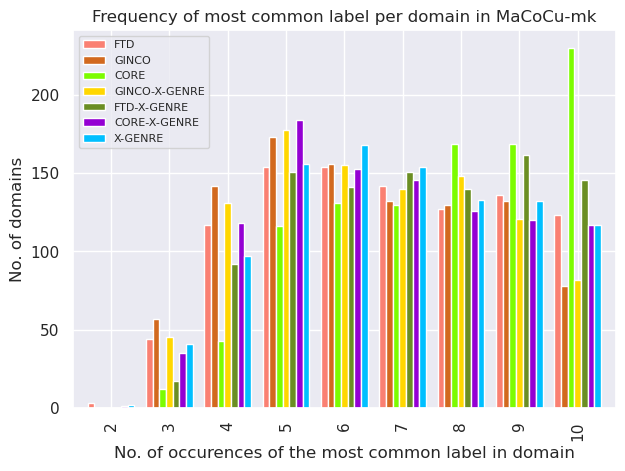

In [31]:
# Plot the histogram
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

histogram_df.plot(kind='bar', width=0.80, color = ["salmon", "chocolate", "lawngreen", "gold", "olivedrab", "darkviolet", "deepskyblue"])

plt.legend(loc=2,prop={'size':8})

plt.gca().set(title='Frequency of most common label per domain in MaCoCu-mk', ylabel='No. of domains', xlabel= 'No. of occurences of the most common label in domain')

# Save the plot
fig1 = plt.gcf()
plt.show()
fig1.savefig("Comparison-of-distribution-in-domains-MaCoCu-mk-histogram.png",dpi=100)

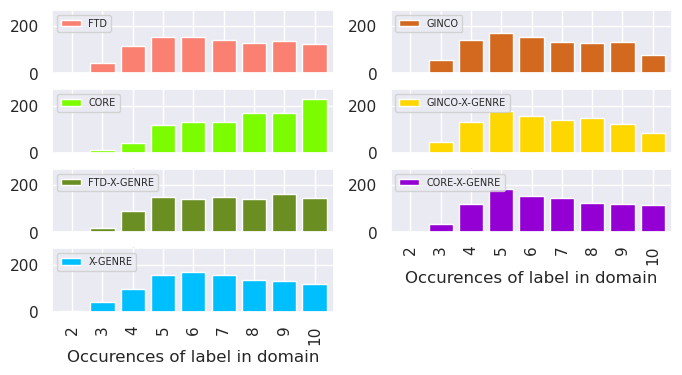

In [32]:
# Create separate histograms for each of the classifiers
# Define the main plot figure that will consists of multiple subplots
plt.figure(figsize= (8,4))

# Define the space between the subplots
plt.subplots_adjust(hspace=.25)

# First subplot
position = 0

colors =["salmon", "chocolate", "lawngreen", "gold", "olivedrab", "darkviolet", "deepskyblue"]

for i in range(7):
	position += 1
	plt.subplot(4,2,position)
	histogram_df[classifiers[i]].plot(kind='bar', width=0.80,ylim=[0,270], color=colors[i])
	plt.legend(loc=2,prop={'size':7})


# Save the plot
fig2 = plt.gcf()
plt.show()
fig2.savefig("Comparison-of-distribution-in-domains-MaCoCu-mk-subplots.png",dpi=100)

### Category report
We will look into how many times each specific category was most frequent on a domain.

In [33]:
# For this, I will use the domain-level corpus
genre_distribution.head(1)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,101foot.mk,"{'A12 (promotion)': 3, 'A16 (information)': 7}","{'Promotion': 1, 'Information/Explanation': 8,...","{'Informational Description/Explanation': 9, '...","{'Promotion': 2, 'Information/Explanation': 7,...","{'Promotion': 1, 'Information/Explanation': 8,...","{'Information/Explanation': 5, 'Instruction': 5}","{'Promotion': 1, 'Information/Explanation': 2,...",7,8,9,7,8,5,7,A16 (information),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Information/Explanation,no,Information/Explanation,yes,Instruction,no


I will group the texts into domains and calculate for each label in each schema in how many domains it is the most frequent.

In [34]:
genre_distribution['most_frequent_label_FTD'].value_counts(normalize=True)

A12 (promotion)       0.496
A8 (news)             0.222
A1 (argumentative)    0.122
A16 (information)     0.091
A17 (review)          0.028
A7 (instruction)      0.026
A9 (legal)            0.008
A4 (fiction)          0.003
A14 (academic)        0.002
A11 (personal)        0.002
Name: most_frequent_label_FTD, dtype: float64

In [35]:
# Create a dataframe with label distribution per classifier

def label_in_domain_distribution(classifier, corpus):
	new_df = pd.DataFrame({f"most frequent label in domain: {classifier}": list(zip(list(corpus[f"most_frequent_label_{classifier}"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"most_frequent_label_{classifier}"].value_counts(normalize=True).to_dict().values())]))})
	return new_df

# Print out for all classifiers
for i in classifiers:
	new_df = label_in_domain_distribution(i, genre_distribution)
	print(new_df.to_markdown(index=False))

| most frequent label in domain: FTD   |
|:-------------------------------------|
| ('A12 (promotion)', 0.5)             |
| ('A8 (news)', 0.22)                  |
| ('A1 (argumentative)', 0.12)         |
| ('A16 (information)', 0.09)          |
| ('A17 (review)', 0.03)               |
| ('A7 (instruction)', 0.03)           |
| ('A9 (legal)', 0.01)                 |
| ('A4 (fiction)', 0.0)                |
| ('A14 (academic)', 0.0)              |
| ('A11 (personal)', 0.0)              |
| most frequent label in domain: GINCO   |
|:---------------------------------------|
| ('News/Reporting', 0.41)               |
| ('Promotion', 0.26)                    |
| ('Information/Explanation', 0.17)      |
| ('Opinion/Argumentation', 0.07)        |
| ('List of Summaries/Excerpts', 0.04)   |
| ('Instruction', 0.03)                  |
| ('Forum', 0.01)                        |
| ('Other', 0.01)                        |
| ('Legal/Regulation', 0.0)              |
| most frequent label in domain: CO

### Calculating scores assuming domains are uni-genre
Calculating F1, precision, recall assuming that domains are uni-genre. To calculate this, I will take the predicted labels as y_pred and the most_frequent_label (most frequent label in domain) labels as y_true.

In [39]:
extended_corpus = pd.read_csv("MaCoCu-mk_with_predictions.csv", sep="\t", index_col = 0)

In [40]:
# For this, I will use the extended corpus with information on the instance-level predicted genre and most frequent genre of the domain
extended_corpus.tail(1)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
9999,sud.mk,http://www.sud.mk/wps/portal/osskopje1/sud/ves...,Соопштенија за јавност | 29.1.2018\nЗаради зго...,"<doc id=""macocu.mk.1959558"" title=""СООПШТЕНИЕ ...",163,A8 (news),"{7: 0.0107, 8: 0.7628, 0: 0.1286, 1: 0.0104, 6...",0.762791,News/Reporting,"{'Forum': 0.0016, 'News/Reporting': 0.9749, 'O...",0.974854,Informational Description/Explanation,"{'Interactive Discussion': 0.0021, 'Narrative'...",0.68887,News,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.989033,News,"{'Promotion': 0.0638, 'Opinion/Argumentation':...",0.750107,News,"{'Other': 0.0302, 'Information/Explanation': 0...",0.718833,News,"{'Other': 0.0001, 'Information/Explanation': 0...",0.998966,sud.mk,"{'A16 (information)': 3, 'A7 (instruction)': 1...","{'Information/Explanation': 1, 'Instruction': ...","{'Informational Description/Explanation': 8, '...","{'Information/Explanation': 3, 'Instruction': ...","{'Legal': 4, 'News': 4, 'Information/Explanati...","{'Information/Explanation': 7, 'Instruction': ...","{'Information/Explanation': 3, 'Instruction': ...",4,5,8,6,4,7,6,A8 (news),no,News/Reporting,no,Informational Description/Explanation,no,News,no,Legal,yes,Information/Explanation,no,News,no


In [43]:
# Let's look at what the information for one domain looks like
extended_corpus[extended_corpus["domain"] == "sud.mk"].head(3)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
9916,sud.mk,http://sud.mk/wps/portal/central/sud/sudski-si...,Судство\nСудство\nОсновни цели и функции на су...,"<doc id=""macocu.mk.1947697"" title=""Судство"" cr...",130,A16 (information),"{7: 0.046, 8: 0.0711, 0: 0.0561, 1: 0.0227, 6:...",0.522667,Information/Explanation,"{'Forum': 0.0065, 'News/Reporting': 0.0081, 'O...",0.937917,Informational Description/Explanation,"{'Interactive Discussion': 0.0012, 'Narrative'...",0.981999,Information/Explanation,"{'Information/Explanation': 0.9879, 'Opinion/A...",0.987920,Legal,"{'Promotion': 0.0207, 'Opinion/Argumentation':...",0.467637,Information/Explanation,"{'Other': 0.0332, 'Information/Explanation': 0...",0.460825,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.998811,sud.mk,"{'A16 (information)': 3, 'A7 (instruction)': 1...","{'Information/Explanation': 1, 'Instruction': ...","{'Informational Description/Explanation': 8, '...","{'Information/Explanation': 3, 'Instruction': ...","{'Legal': 4, 'News': 4, 'Information/Explanati...","{'Information/Explanation': 7, 'Instruction': ...","{'Information/Explanation': 3, 'Instruction': ...",4,5,8,6,4,7,6,A8 (news),no,News/Reporting,no,Informational Description/Explanation,no,News,no,Legal,yes,Information/Explanation,no,News,no
9958,sud.mk,http://sud.mk/wps/portal/ossvnikole/sud/bl/inf...,Корисни информации\nКорисни информации\nСите с...,"<doc id=""macocu.mk.1955517"" title=""Корисни инф...",256,A7 (instruction),"{7: 0.5217, 8: 0.0415, 0: 0.0531, 1: 0.0196, 6...",0.521662,Instruction,"{'Forum': 0.0168, 'News/Reporting': 0.007, 'Op...",0.788918,Informational Description/Explanation,"{'Interactive Discussion': 0.0078, 'Narrative'...",0.752495,Instruction,"{'Information/Explanation': 0.0112, 'Opinion/A...",0.946994,Legal,"{'Promotion': 0.0543, 'Opinion/Argumentation':...",0.492924,Instruction,"{'Other': 0.0257, 'Information/Explanation': 0...",0.571635,Instruction,"{'Other': 0.0002, 'Information/Explanation': 0...",0.997480,sud.mk,"{'A16 (information)': 3, 'A7 (instruction)': 1...","{'Information/Explanation': 1, 'Instruction': ...","{'Informational Description/Explanation': 8, '...","{'Information/Explanation': 3, 'Instruction': ...","{'Legal': 4, 'News': 4, 'Information/Explanati...","{'Information/Explanation': 7, 'Instruction': ...","{'Information/Explanation': 3, 'Instruction': ...",4,5,8,6,4,7,6,A8 (news),no,News/Reporting,no,Informational Description/Explanation,no,News,no,Legal,yes,Information/Explanation,no,News,no
9985,sud.mk,http://www.sud.mk/wps/portal/osskopje1/sud/ves...,Заради интерес на одредени медиуми околу пресу...,"<doc id=""macocu.mk.1958977"" title=""СООПШТЕНИЕ ...",107,A9 (legal),"{7: 0.0288, 8: 0.1633, 0: 0.1351, 1: 0.0213, 6...",0.468351,News/Reporting,"{'Forum': 0.0055, 'News/Reporting': 0.8752, 'O...",0.875220,Narrative,"{'Interactive Discussion': 0.0043, 'Narrative'...

In [44]:
extended_corpus.columns

Index(['domain', 'url', 'text', 'doc', 'length', 'FTD',
       'FTD_label_distribution', 'FTD_confidence', 'GINCO',
       'GINCO_label_distribution', 'GINCO_confidence', 'CORE',
       'CORE_label_distribution', 'CORE_confidence', 'GINCO-X-GENRE',
       'GINCO-X-GENRE_label_distribution', 'GINCO-X-GENRE_confidence',
       'FTD-X-GENRE', 'FTD-X-GENRE_label_distribution',
       'FTD-X-GENRE_confidence', 'CORE-X-GENRE',
       'CORE-X-GENRE_label_distribution', 'CORE-X-GENRE_confidence', 'X-GENRE',
       'X-GENRE_label_distribution', 'X-GENRE_confidence', 'domain_id',
       'genres-in-domain-FTD', 'genres-in-domain-GINCO',
       'genres-in-domain-CORE', 'genres-in-domain-GINCO-X-GENRE',
       'genres-in-domain-FTD-X-GENRE', 'genres-in-domain-CORE-X-GENRE',
       'genres-in-domain-X-GENRE', 'biggest-label-frequency-FTD',
       'biggest-label-frequency-GINCO', 'biggest-label-frequency-CORE',
       'biggest-label-frequency-GINCO-X-GENRE',
       'biggest-label-frequency-FTD-X-GENR

In [45]:
# Code for getting micro, macro F1 scores, the classification report and the confusion matrix based on the predicted labels and the most frequent labels per domain (using domain information as a weak signal, under a hypothesis that texts from the same domain are usually in the same genre)

def scores_based_on_domain_signal(classifier):
	print(f"Classifier: {classifier}")

	y_pred = extended_corpus[f"{classifier}"].to_list()
	y_true = extended_corpus[f"most_frequent_label_{classifier}"].to_list()

	LABELS = list(extended_corpus[f"{classifier}"].unique())

	# Calculate the scores
	macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
	micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
	print(f"Macro F1: {macro:0.3}, Micro F1: {micro:0.3}")

	# Print classification report
	print(classification_report(y_true, y_pred, labels = LABELS))
	classification_report_dict = classification_report(y_true, y_pred, labels = LABELS, output_dict=True)

	results = {"classifier":f"{classifier}", "Macro F1": round(macro,2), "Micro F1": round(micro,2), "Macro precision": round(classification_report_dict['macro avg']['precision'],2), "Macro recall": round(classification_report_dict["macro avg"]["recall"],2)}

	# Plot the confusion matrix:
	cm = confusion_matrix(y_true, y_pred, labels=LABELS)
	plt.figure(figsize=(9, 9))
	plt.imshow(cm, cmap="Oranges")
	for (i, j), z in np.ndenumerate(cm):
		plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
	classNames = LABELS
	plt.ylabel('Predicted label')
	plt.xlabel('Most frequent label in domain')
	tick_marks = np.arange(len(classNames))
	plt.xticks(tick_marks, classNames, rotation=90)
	plt.yticks(tick_marks, classNames)
	plt.title(f"Comparison of predicted labels and labels that are most frequent per domain: {classifier}")

	plt.tight_layout()
	fig1 = plt.gcf()
	plt.show()
	plt.draw()
	#fig1.savefig("",dpi=100)

	return results

Classifier: FTD
Macro F1: 0.456, Micro F1: 0.676
                    precision    recall  f1-score   support

      A17 (review)       0.39      0.54      0.46       280
   A12 (promotion)       0.87      0.74      0.80      4960
A1 (argumentative)       0.57      0.62      0.59      1220
         A8 (news)       0.71      0.63      0.67      2220
  A7 (instruction)       0.35      0.60      0.44       260
 A16 (information)       0.46      0.60      0.52       910
    A14 (academic)       0.19      0.55      0.28        20
        A9 (legal)       0.22      0.57      0.32        80
    A11 (personal)       0.10      0.55      0.16        20
      A4 (fiction)       0.26      0.40      0.31        30

          accuracy                           0.68     10000
         macro avg       0.41      0.58      0.46     10000
      weighted avg       0.72      0.68      0.69     10000



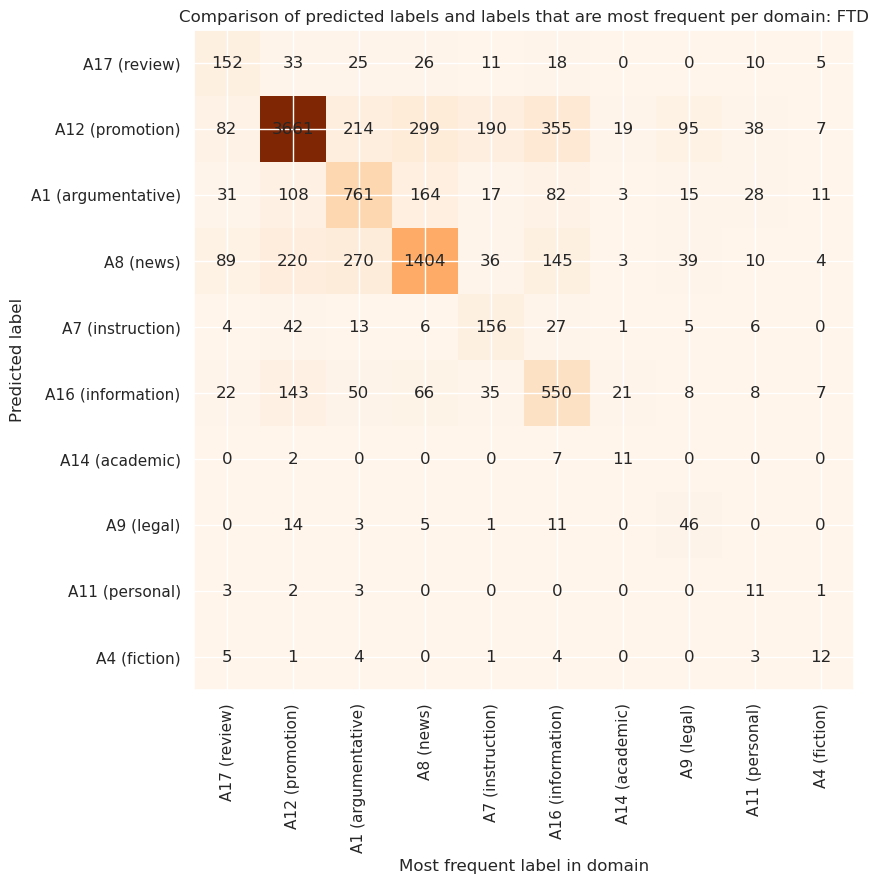

Classifier: GINCO
Macro F1: 0.507, Micro F1: 0.647
                            precision    recall  f1-score   support

List of Summaries/Excerpts       0.23      0.52      0.32       370
                 Promotion       0.77      0.72      0.75      2630
   Information/Explanation       0.57      0.59      0.58      1700
                     Other       0.11      0.42      0.17        80
               Instruction       0.40      0.59      0.48       330
            News/Reporting       0.85      0.66      0.74      4090
     Opinion/Argumentation       0.47      0.58      0.52       670
          Legal/Regulation       0.25      0.90      0.39        20
                     Forum       0.63      0.62      0.62       110

                  accuracy                           0.65     10000
                 macro avg       0.48      0.62      0.51     10000
              weighted avg       0.71      0.65      0.67     10000



<Figure size 700x500 with 0 Axes>

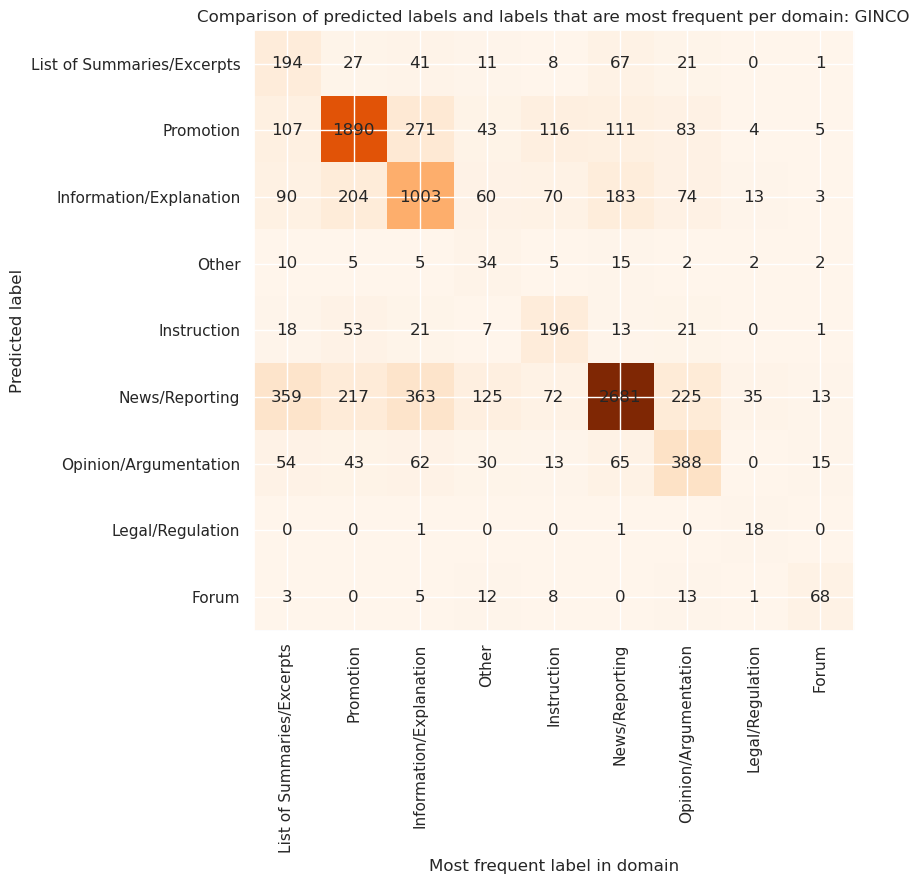

Classifier: CORE
Macro F1: 0.52, Micro F1: 0.766
                                       precision    recall  f1-score   support

                              Opinion       0.42      0.57      0.48       330
Informational Description/Explanation       0.88      0.81      0.84      6320
                            Narrative       0.74      0.74      0.74      2380
             Informational Persuasion       0.52      0.62      0.57       610
                 How-To/Instructional       0.39      0.68      0.49       240
                               Spoken       0.06      0.50      0.11        10
                              Lyrical       0.33      0.43      0.37        30
               Interactive Discussion       0.52      0.60      0.56        80

                             accuracy                           0.77     10000
                            macro avg       0.48      0.62      0.52     10000
                         weighted avg       0.79      0.77      0.78     10000



<Figure size 700x500 with 0 Axes>

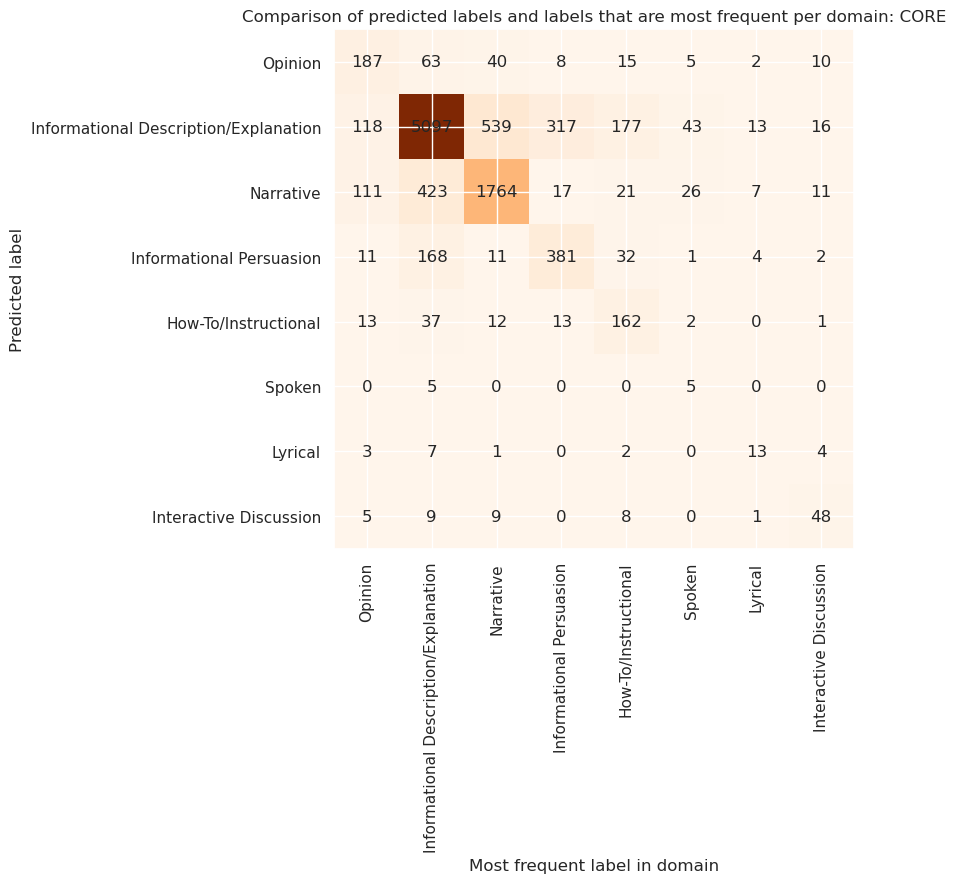

Classifier: GINCO-X-GENRE
Macro F1: 0.473, Micro F1: 0.655


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

  Opinion/Argumentation       0.45      0.57      0.50       500
              Promotion       0.78      0.68      0.73      3300
                   News       0.85      0.68      0.76      3790
                  Other       0.16      0.41      0.23       300
Information/Explanation       0.54      0.60      0.57      1660
            Instruction       0.37      0.67      0.48       320
                  Legal       0.22      0.83      0.35        30
          Prose/Lyrical       0.00      0.00      0.00         0
                  Forum       0.64      0.63      0.64       100

               accuracy                           0.66     10000
              macro avg       0.45      0.56      0.47     10000
           weighted avg       0.71      0.66      0.68     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 700x500 with 0 Axes>

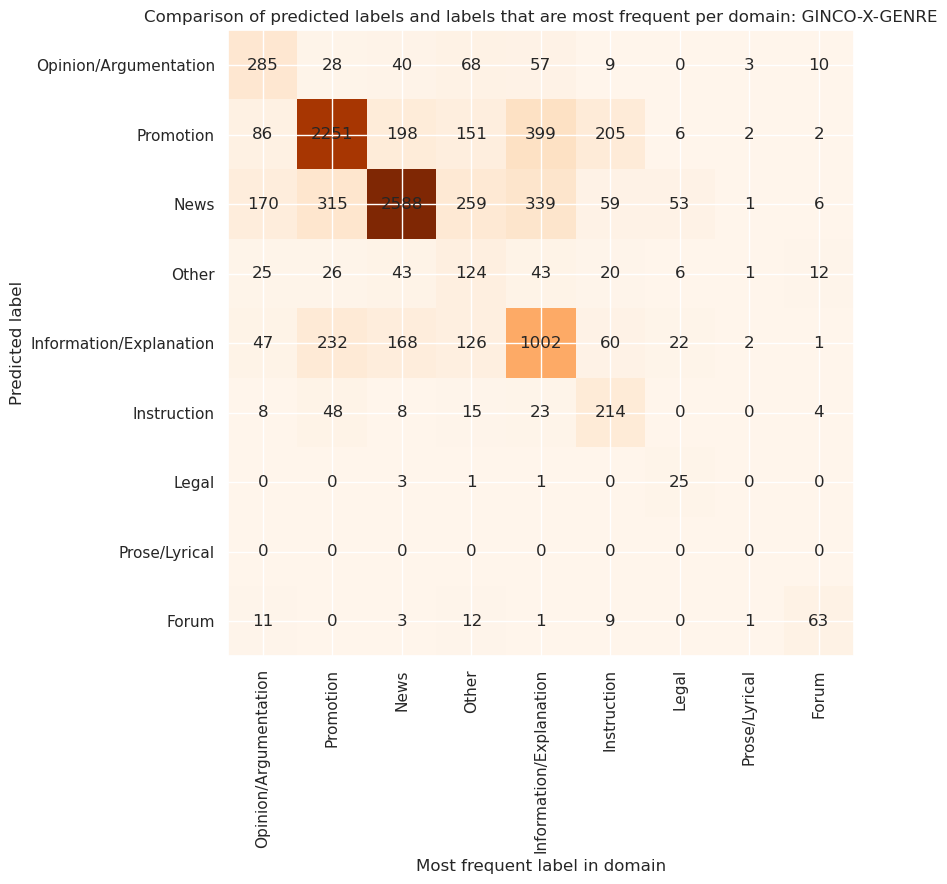

Classifier: FTD-X-GENRE
Macro F1: 0.529, Micro F1: 0.712
                         precision    recall  f1-score   support

              Promotion       0.82      0.75      0.78      4780
                   News       0.80      0.71      0.75      2970
Information/Explanation       0.53      0.66      0.59      1570
            Instruction       0.42      0.61      0.49       330
                  Legal       0.29      0.54      0.38       170
  Opinion/Argumentation       0.49      0.51      0.50       160
          Prose/Lyrical       0.13      0.55      0.21        20

               accuracy                           0.71     10000
              macro avg       0.50      0.62      0.53     10000
           weighted avg       0.74      0.71      0.72     10000



<Figure size 700x500 with 0 Axes>

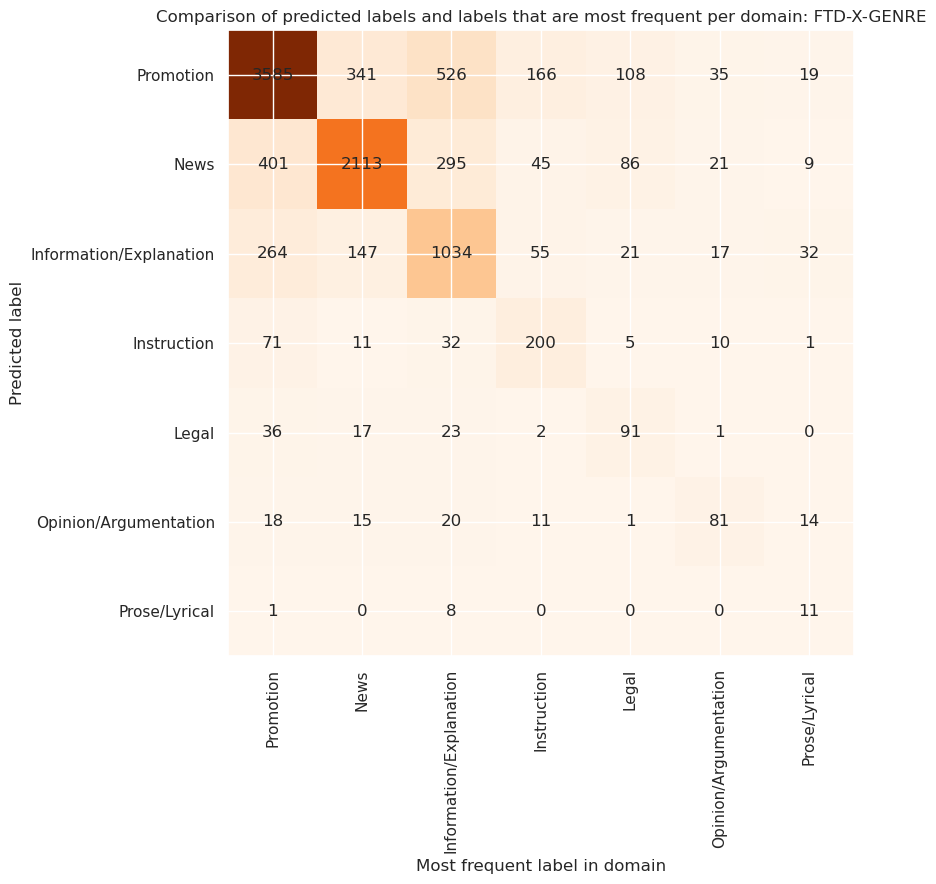

Classifier: CORE-X-GENRE
Macro F1: 0.513, Micro F1: 0.67
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.37      0.52      0.43       900
                   News       0.81      0.73      0.77      3400
Information/Explanation       0.77      0.68      0.72      4130
            Instruction       0.53      0.61      0.57      1110
                  Forum       0.43      0.58      0.50       320
          Prose/Lyrical       0.31      0.50      0.38       100
                  Other       0.14      0.50      0.22        40

               accuracy                           0.67     10000
              macro avg       0.48      0.59      0.51     10000
           weighted avg       0.70      0.67      0.68     10000



<Figure size 700x500 with 0 Axes>

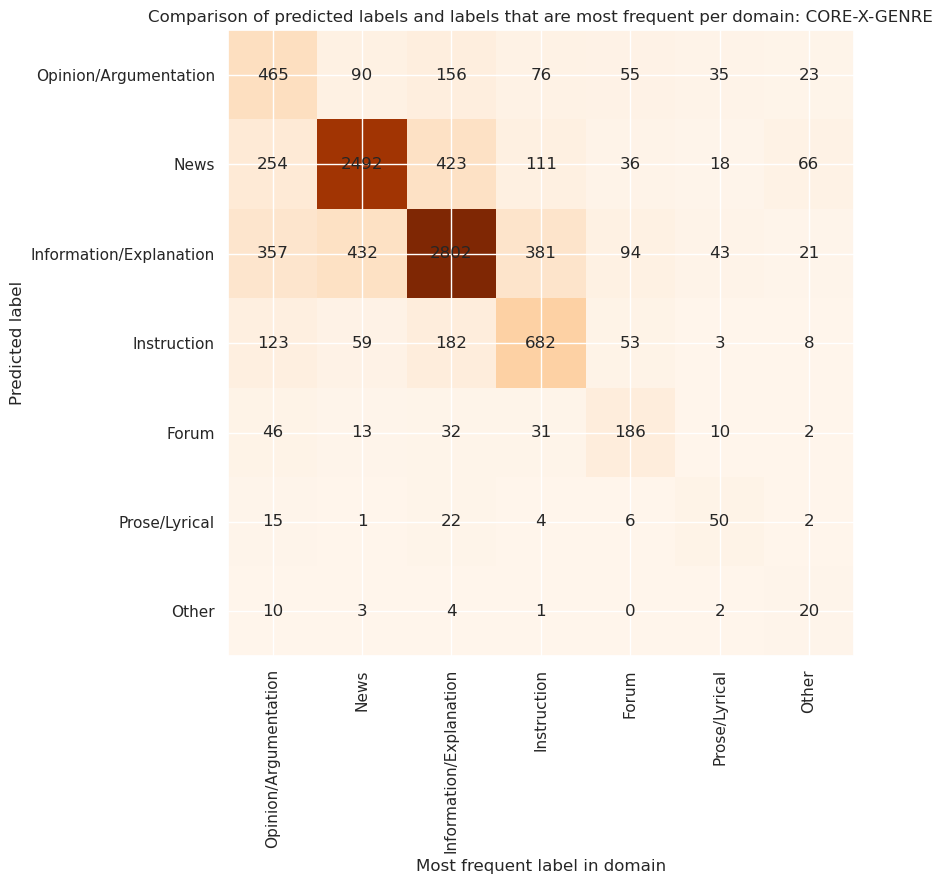

Classifier: X-GENRE
Macro F1: 0.505, Micro F1: 0.68
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.43      0.58      0.49       560
              Promotion       0.79      0.71      0.75      2960
                   News       0.86      0.72      0.78      4100
Information/Explanation       0.52      0.61      0.56      1540
                  Other       0.13      0.41      0.20        80
            Instruction       0.46      0.61      0.52       490
          Prose/Lyrical       0.29      0.45      0.35        40
                  Forum       0.53      0.56      0.54       130
                  Legal       0.24      0.58      0.34       100

               accuracy                           0.68     10000
              macro avg       0.47      0.58      0.50     10000
           weighted avg       0.73      0.68      0.70     10000



<Figure size 700x500 with 0 Axes>

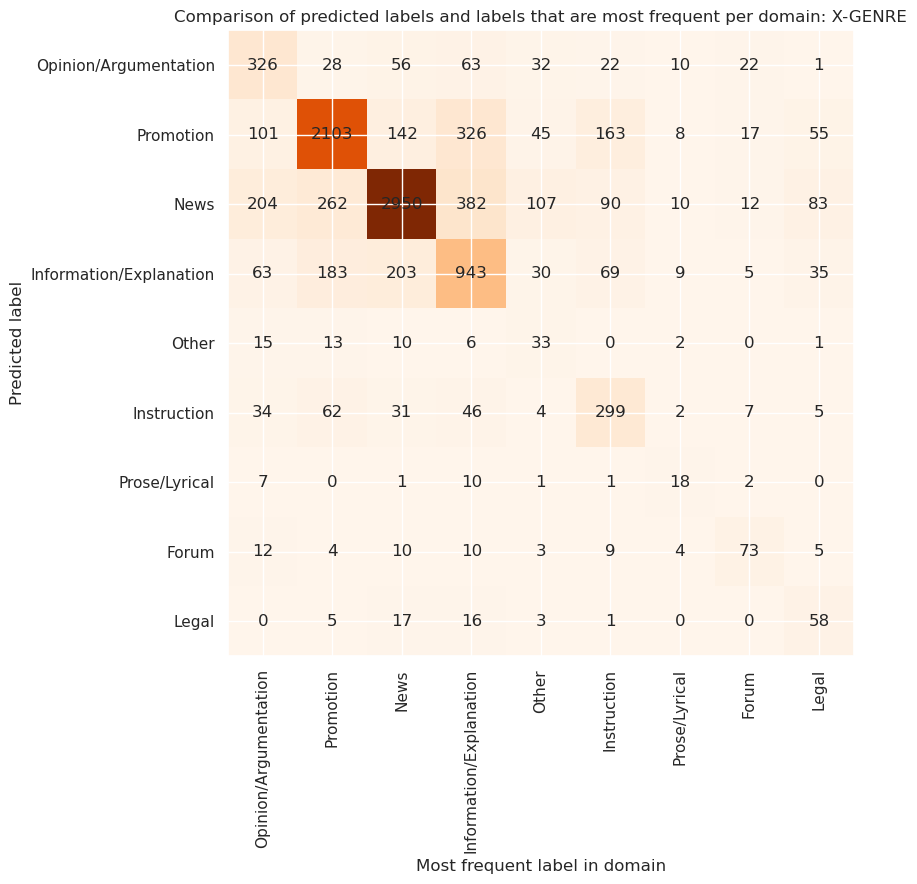

{'Classifier': ['FTD',
  'GINCO',
  'CORE',
  'GINCO-X-GENRE',
  'FTD-X-GENRE',
  'CORE-X-GENRE',
  'X-GENRE'],
 'Macro F1': [0.46, 0.51, 0.52, 0.47, 0.53, 0.51, 0.5],
 'Micro F1': [0.68, 0.65, 0.77, 0.66, 0.71, 0.67, 0.68],
 'Macro precision': [0.41, 0.48, 0.48, 0.45, 0.5, 0.48, 0.47],
 'Macro recall': [0.58, 0.62, 0.62, 0.56, 0.62, 0.59, 0.58]}

<Figure size 700x500 with 0 Axes>

In [46]:
results_dict= {'Classifier': [], 'Macro F1': [], 'Micro F1': [], 'Macro precision': [], 'Macro recall': []}

for classifier in classifiers:
	results_report = scores_based_on_domain_signal(classifier)
	results_dict['Classifier'].append(results_report["classifier"])
	results_dict['Macro F1'].append(results_report['Macro F1'])
	results_dict['Micro F1'].append(results_report['Micro F1'])
	results_dict['Macro precision'].append(results_report['Macro precision'])
	results_dict['Macro recall'].append(results_report['Macro recall'])

results_dict


In [47]:
# Create a dataframe with results
results_df = pd.DataFrame(results_dict)
results_df = results_df.sort_values("Macro F1", ascending=False)

print(results_df.to_markdown(index=False))

| Classifier    |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:--------------|-----------:|-----------:|------------------:|---------------:|
| FTD-X-GENRE   |       0.53 |       0.71 |              0.5  |           0.62 |
| CORE          |       0.52 |       0.77 |              0.48 |           0.62 |
| GINCO         |       0.51 |       0.65 |              0.48 |           0.62 |
| CORE-X-GENRE  |       0.51 |       0.67 |              0.48 |           0.59 |
| X-GENRE       |       0.5  |       0.68 |              0.47 |           0.58 |
| GINCO-X-GENRE |       0.47 |       0.66 |              0.45 |           0.56 |
| FTD           |       0.46 |       0.68 |              0.41 |           0.58 |


## Comparison of X-GENRE predictions based on the majority prediction
Focus only on X-genre and assume the domain label to be the one that has been chosen most by ALL classifiers, calculate F1, (microF1, macroF1)

In [48]:
x_genre_classifiers = ["GINCO-X-GENRE", "FTD-X-GENRE", "CORE-X-GENRE", "X-GENRE"]

In [49]:
corpus.head(1)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence
0,gg.mk,https://gg.mk/,"Тоа е тоа, екипа. Претпоследната епизода ја на...","<doc id=""macocu.mk.4"" title=""GG.MK - е-спорт &...",864,A17 (review),"{7: 0.0152, 8: 0.1352, 0: 0.0334, 1: 0.0402, 6...",0.643622,List of Summaries/Excerpts,"{'Forum': 0.0036, 'News/Reporting': 0.0147, 'O...",0.919893,Opinion,"{'Interactive Discussion': 0.0085, 'Narrative'...",0.541413,Opinion/Argumentation,"{'Information/Explanation': 0.0055, 'Opinion/A...",0.861316,Promotion,"{'Promotion': 0.526, 'Opinion/Argumentation': ...",0.525988,Opinion/Argumentation,"{'Other': 0.0953, 'Information/Explanation': 0...",0.419943,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.9987


Calculate the majority X-GENRE label based on the predictions of the X-GENRE classifiers (on instance level)

In [50]:
corpus[x_genre_classifiers]

,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE
0,Opinion/Argumentation,Promotion,Opinion/Argumentation,Opinion/Argumentation
1,Promotion,Promotion,News,Promotion
2,Promotion,Promotion,Information/Explanation,Promotion
3,News,News,News,News
4,Other,Promotion,Information/Explanation,Information/Explanation
...,...,...,...,...
9995,Information/Explanation,Promotion,Instruction,Promotion
9996,Information/Explanation,Legal,Information/Explanation,Information/Explanation
9997,Other,Opinion/Argumentation,Forum,Other
9998,News,News,News,News


In [51]:
# Create a list of X-GENRE labels
majority_label_list = list(zip(list(corpus["GINCO-X-GENRE"]), list(corpus["FTD-X-GENRE"]), list(corpus["CORE-X-GENRE"]), list(corpus["X-GENRE"])))

majority_label_list[:3]

[('Opinion/Argumentation',
  'Promotion',
  'Opinion/Argumentation',
  'Opinion/Argumentation'),
 ('Promotion', 'Promotion', 'News', 'Promotion'),
 ('Promotion', 'Promotion', 'Information/Explanation', 'Promotion')]

In [52]:
# Find the most frequent X-GENRE label out of the 4 X-GENRE labels by using the multimode function
majority_label_counter_list = [multimode(x) for x in majority_label_list]
majority_label_counter_list[:3]

[['Opinion/Argumentation'], ['Promotion'], ['Promotion']]

In [53]:
# Create the final list. If there is a tie, add information about that to a specific list and randomly choice the most frequent value
majority_label = []
majority_label_tie = []

for i in majority_label_counter_list:
	if len(i) == 1:
		majority_label.append(i[0])
		majority_label_tie.append("no")
	else:
		majority_label.append(random.choice(i))
		majority_label_tie.append("yes")

print(majority_label[:3])
print(majority_label_tie[:3])

# Add the lists to the dataframe
corpus["X-GENRE-majority-label"] = majority_label
corpus["X-GENRE-majority-label-tie"] = majority_label_tie

['Opinion/Argumentation', 'Promotion', 'Promotion']
['no', 'no', 'no']


In [54]:
# View the results
corpus[['GINCO-X-GENRE', 'FTD-X-GENRE', 'CORE-X-GENRE', 'X-GENRE', "X-GENRE-majority-label","X-GENRE-majority-label-tie"]].head(5)

,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE,X-GENRE-majority-label,X-GENRE-majority-label-tie
0,Opinion/Argumentation,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,no
1,Promotion,Promotion,News,Promotion,Promotion,no
2,Promotion,Promotion,Information/Explanation,Promotion,Promotion,no
3,News,News,News,News,News,no
4,Other,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,no


In [55]:
print(corpus["X-GENRE-majority-label-tie"].value_counts(normalize=True).to_markdown())

|     |   X-GENRE-majority-label-tie |
|:----|-----------------------------:|
| no  |                       0.8974 |
| yes |                       0.1026 |


In [56]:
print(corpus["X-GENRE-majority-label"].value_counts(normalize=True).to_markdown())

|                         |   X-GENRE-majority-label |
|:------------------------|-------------------------:|
| News                    |                   0.3261 |
| Promotion               |                   0.2827 |
| Information/Explanation |                   0.2103 |
| Instruction             |                   0.0617 |
| Opinion/Argumentation   |                   0.0586 |
| Legal                   |                   0.0202 |
| Other                   |                   0.0201 |
| Forum                   |                   0.0121 |
| Prose/Lyrical           |                   0.0082 |


In [57]:
# Save the extended corpus
corpus.to_csv("MaCoCu-mk_with_predictions.csv", sep="\t")

In [60]:
# Code for getting micro, macro F1 scores, the classification report and the confusion matrix based on the predicted labels and the majority label

def scores_based_on_majority_label(classifier):
	print(f"Classifier: {classifier}")

	y_pred = corpus[f"{classifier}"].to_list()
	y_true = corpus["X-GENRE-majority-label"].to_list()

	LABELS = list(corpus[f"{classifier}"].unique())

	# Calculate the scores
	macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
	micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
	print(f"Macro F1: {macro:0.3}, Micro F1: {micro:0.3}")

	# Print classification report
	print(classification_report(y_true, y_pred, labels = LABELS))
	classification_report_dict = classification_report(y_true, y_pred, labels = LABELS, output_dict=True)

	results = {"classifier":f"{classifier}", "Macro F1": round(macro,2), "Micro F1": round(micro,2), "Macro precision": round(classification_report_dict['macro avg']['precision'],2), "Macro recall": round(classification_report_dict["macro avg"]["recall"],2)}

	# Plot the confusion matrix:
	cm = confusion_matrix(y_true, y_pred, labels=LABELS)
	plt.figure(figsize=(7, 7))
	plt.imshow(cm, cmap="Oranges")
	for (i, j), z in np.ndenumerate(cm):
		plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
	classNames = LABELS
	plt.ylabel('Predicted label')
	plt.xlabel('Majority X-GENRE label ("true" label)')
	tick_marks = np.arange(len(classNames))
	plt.xticks(tick_marks, classNames, rotation=90)
	plt.yticks(tick_marks, classNames)
	plt.title(f"Comparison of predicted labels and the majority X-GENRE label: {classifier}")

	plt.tight_layout()
	fig1 = plt.gcf()
	plt.show()
	plt.draw()
	#fig1.savefig("",dpi=100)

	return results

Classifier: GINCO-X-GENRE
Macro F1: 0.687, Micro F1: 0.848
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.71      0.77      0.74       586
              Promotion       0.88      0.91      0.90      2827
                   News       0.96      0.90      0.93      3261
                  Other       0.24      0.92      0.39       201
Information/Explanation       0.89      0.79      0.83      2103
            Instruction       0.85      0.79      0.82       617
                  Legal       0.95      0.52      0.68       202
          Prose/Lyrical       1.00      0.12      0.22        82
                  Forum       0.77      0.62      0.68       121

               accuracy                           0.85     10000
              macro avg       0.81      0.70      0.69     10000
           weighted avg       0.89      0.85      0.86     10000



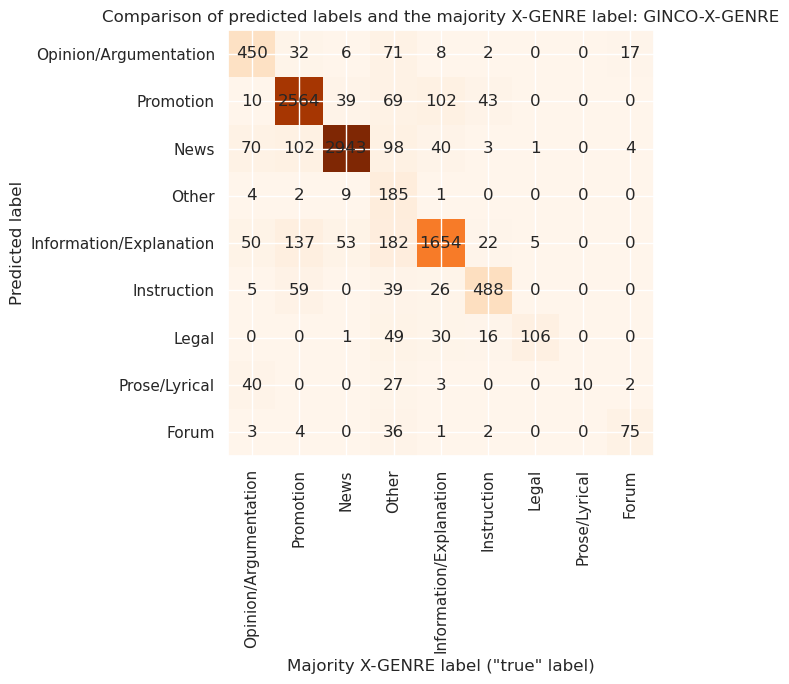

Classifier: FTD-X-GENRE
Macro F1: 0.703, Micro F1: 0.776
                         precision    recall  f1-score   support

              Promotion       0.64      0.98      0.77      2827
                   News       0.95      0.77      0.85      3261
Information/Explanation       0.81      0.74      0.77      2103
            Instruction       0.86      0.67      0.75       617
                  Legal       0.63      0.97      0.76       202
  Opinion/Argumentation       0.62      0.18      0.27       586
          Prose/Lyrical       0.72      0.76      0.74        82

              micro avg       0.76      0.79      0.78      9678
              macro avg       0.75      0.72      0.70      9678
           weighted avg       0.79      0.79      0.77      9678



<Figure size 700x500 with 0 Axes>

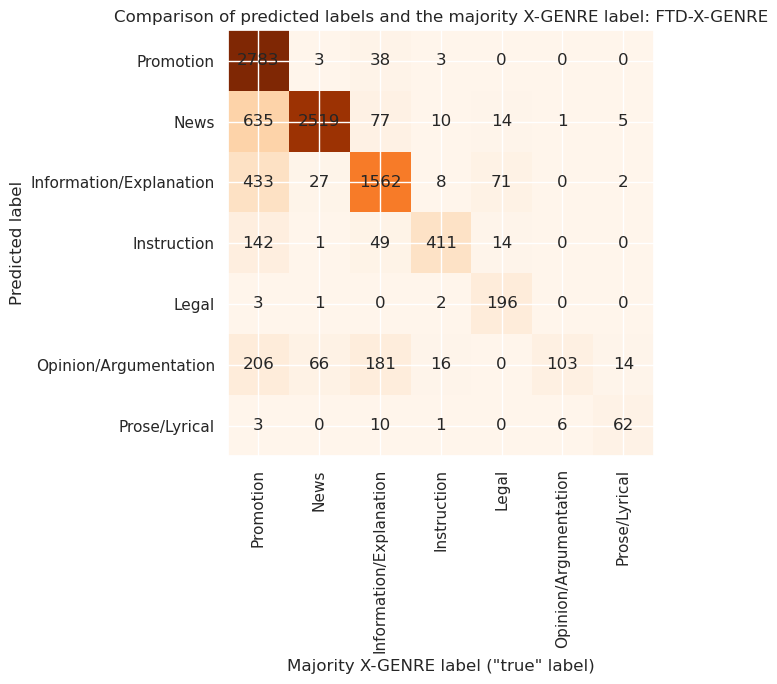

Classifier: CORE-X-GENRE
Macro F1: 0.567, Micro F1: 0.673
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.29      0.64      0.40       586
                   News       0.86      0.81      0.84      3261
Information/Explanation       0.51      0.88      0.65      2103
            Instruction       0.43      0.90      0.59       617
                  Forum       0.27      0.94      0.41       121
          Prose/Lyrical       0.49      0.96      0.65        82
                  Other       0.52      0.37      0.43       201

              micro avg       0.57      0.82      0.67      6971
              macro avg       0.48      0.79      0.57      6971
           weighted avg       0.64      0.82      0.70      6971



<Figure size 700x500 with 0 Axes>

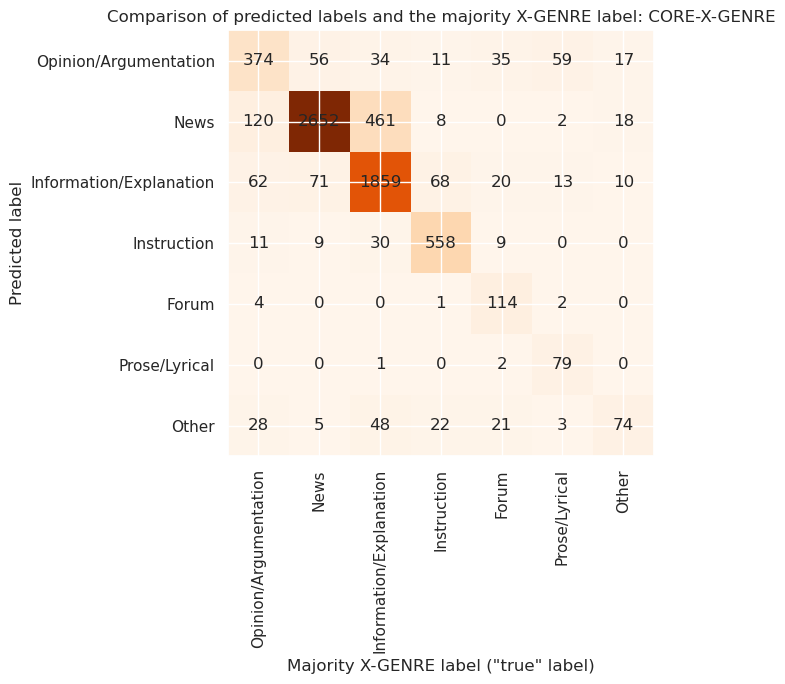

Classifier: X-GENRE
Macro F1: 0.847, Micro F1: 0.897
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.71      0.92      0.80       586
              Promotion       0.94      0.89      0.91      2827
                   News       0.92      0.96      0.94      3261
Information/Explanation       0.95      0.81      0.87      2103
                  Other       0.63      0.81      0.71       201
            Instruction       0.85      0.90      0.87       617
          Prose/Lyrical       0.89      0.68      0.77        82
                  Forum       0.84      0.96      0.90       121
                  Legal       0.77      0.93      0.84       202

               accuracy                           0.90     10000
              macro avg       0.83      0.87      0.85     10000
           weighted avg       0.90      0.90      0.90     10000



<Figure size 700x500 with 0 Axes>

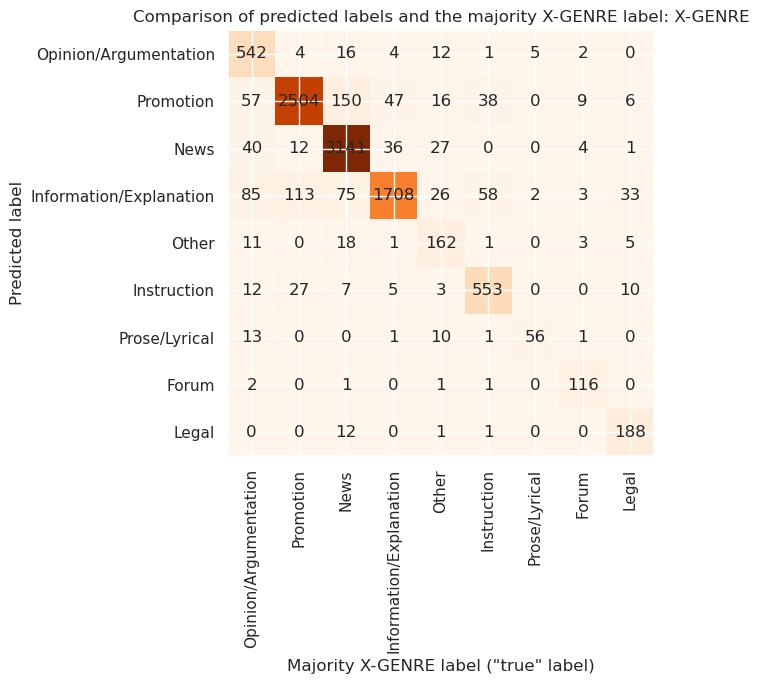

{'Classifier': ['GINCO-X-GENRE', 'FTD-X-GENRE', 'CORE-X-GENRE', 'X-GENRE'],
 'Macro F1': [0.69, 0.7, 0.57, 0.85],
 'Micro F1': [0.85, 0.78, 0.67, 0.9],
 'Macro precision': [0.81, 0.75, 0.48, 0.83],
 'Macro recall': [0.7, 0.72, 0.79, 0.87]}

<Figure size 700x500 with 0 Axes>

In [61]:
results_dict_x_genre= {'Classifier': [], 'Macro F1': [], 'Micro F1': [], 'Macro precision': [], 'Macro recall': []}

for classifier in x_genre_classifiers:
	results_report = scores_based_on_majority_label(classifier)
	results_dict_x_genre['Classifier'].append(results_report["classifier"])
	results_dict_x_genre['Macro F1'].append(results_report['Macro F1'])
	results_dict_x_genre['Micro F1'].append(results_report['Micro F1'])
	results_dict_x_genre['Macro precision'].append(results_report['Macro precision'])
	results_dict_x_genre['Macro recall'].append(results_report['Macro recall'])

results_dict_x_genre

In [62]:
# Create a dataframe with results
x_genre_df = pd.DataFrame(results_dict_x_genre)
x_genre_df = x_genre_df.sort_values("Macro F1", ascending=False)

print(x_genre_df.to_markdown(index=False))

| Classifier    |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:--------------|-----------:|-----------:|------------------:|---------------:|
| X-GENRE       |       0.85 |       0.9  |              0.83 |           0.87 |
| FTD-X-GENRE   |       0.7  |       0.78 |              0.75 |           0.72 |
| GINCO-X-GENRE |       0.69 |       0.85 |              0.81 |           0.7  |
| CORE-X-GENRE  |       0.57 |       0.67 |              0.48 |           0.79 |


## Agreement between X-GENRE classifiers
For X-genre classifiers, calculate agreement between them via F1, macroF1, microF1 (one classifier y_pred, another y_true - confusion matrix).

In [66]:
# Code for getting micro, macro F1 scores, the classification report and the confusion matrix based on the predicted labels and the majority label

def classifier_agreement(classifier_combination):
	print(f"Comparison of classifiers: {classifier_combination[0]} as y_true, {classifier_combination[1]} as y_pred")
	
	y_true = corpus[f"{classifier_combination[0]}"].to_list()
	y_pred = corpus[f"{classifier_combination[1]}"].to_list()

	# FTD-X-GENRE has less labels (7) than other corpora, so if it occurs in the combination, we will use its labels as the labels list to avoid division by 0
	if classifier_combination[0] == "FTD-X-GENRE" or classifier_combination[1] == 'FTD-X-GENRE':
		LABELS = list(corpus["FTD-X-GENRE"].unique())
	else:
		LABELS = list(corpus[f"{classifier_combination[1]}"].unique())

	# Calculate the scores
	macro = f1_score(y_true, y_pred, labels=LABELS, average="macro", zero_division=0)
	micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro", zero_division=0)
	print(f"Macro F1: {macro:0.3}, Micro F1: {micro:0.3}")

	# Print classification report
	print(classification_report(y_true, y_pred, labels = LABELS))
	classification_report_dict = classification_report(y_true, y_pred, labels = LABELS, output_dict=True)

	results = {"Classifier as y_true": f"{classifier_combination[0]}", "Classifier as y_pred": f"{classifier_combination[1]}", "Macro F1": round(macro,2), "Micro F1": round(micro,2), "Macro precision": round(classification_report_dict['macro avg']['precision'],2), "Macro recall": round(classification_report_dict["macro avg"]["recall"],2)}

	# Plot the confusion matrix:
	cm = confusion_matrix(y_true, y_pred, labels=LABELS)
	plt.figure(figsize=(7, 7))
	plt.imshow(cm, cmap="Oranges")
	for (i, j), z in np.ndenumerate(cm):
		plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
	classNames = LABELS
	plt.ylabel(f'{classifier_combination[1]}')
	plt.xlabel(f'{classifier_combination[0]} ("true" label)')
	tick_marks = np.arange(len(classNames))
	plt.xticks(tick_marks, classNames, rotation=90)
	plt.yticks(tick_marks, classNames)
	plt.title(f'Comparison of {classifier_combination[0]} as y_true and {classifier_combination[1]} as y_pred')

	plt.tight_layout()
	fig1 = plt.gcf()
	plt.show()
	plt.draw()
	#fig1.savefig("",dpi=100)

	return results

In [67]:
x_genre_combinations = [['GINCO-X-GENRE', 'FTD-X-GENRE'], ['GINCO-X-GENRE', 'CORE-X-GENRE'],['GINCO-X-GENRE', 'X-GENRE'], ['FTD-X-GENRE', 'GINCO-X-GENRE'], ['FTD-X-GENRE', 'CORE-X-GENRE'], ['FTD-X-GENRE', 'X-GENRE'], ['CORE-X-GENRE', 'GINCO-X-GENRE'], ['CORE-X-GENRE', 'FTD-X-GENRE'], ['CORE-X-GENRE', 'X-GENRE'], ['X-GENRE', 'GINCO-X-GENRE'], ['X-GENRE', 'FTD-X-GENRE'], ['X-GENRE', 'CORE-X-GENRE']]

Comparison of classifiers: GINCO-X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.53, Micro F1: 0.709
                         precision    recall  f1-score   support

              Promotion       0.61      0.92      0.73      2900
                   News       0.89      0.77      0.82      3051
Information/Explanation       0.65      0.67      0.66      1865
            Instruction       0.71      0.59      0.65       576
                  Legal       0.34      0.94      0.50       112
  Opinion/Argumentation       0.50      0.13      0.21       632
          Prose/Lyrical       0.08      0.70      0.15        10

              micro avg       0.68      0.74      0.71      9146
              macro avg       0.54      0.67      0.53      9146
           weighted avg       0.70      0.74      0.70      9146



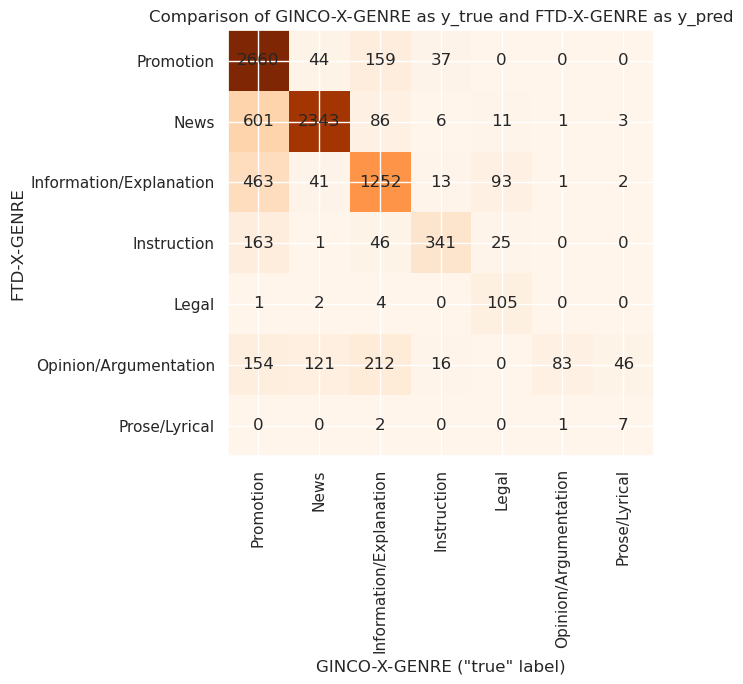

Comparison of classifiers: GINCO-X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.384, Micro F1: 0.568
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.21      0.43      0.28       632
                   News       0.78      0.79      0.78      3051
Information/Explanation       0.42      0.82      0.56      1865
            Instruction       0.37      0.82      0.51       576
                  Forum       0.18      0.81      0.30        98
          Prose/Lyrical       0.06      1.00      0.12        10
                  Other       0.44      0.08      0.14       756

              micro avg       0.48      0.69      0.57      6988
              macro avg       0.35      0.68      0.38      6988
           weighted avg       0.55      0.69      0.58      6988



<Figure size 700x500 with 0 Axes>

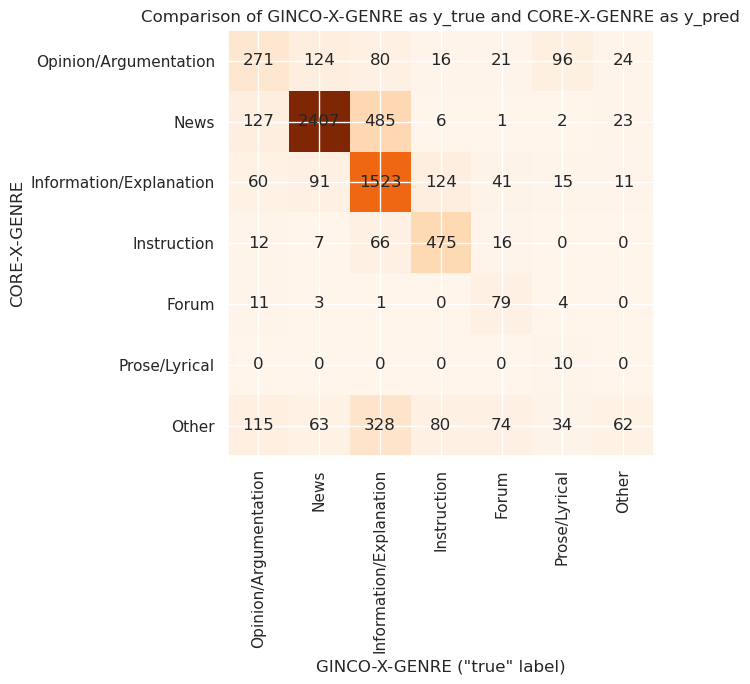

Comparison of classifiers: GINCO-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.632, Micro F1: 0.789
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.63      0.76      0.69       632
              Promotion       0.86      0.79      0.83      2900
                   News       0.84      0.94      0.89      3051
Information/Explanation       0.79      0.77      0.78      1865
                  Other       0.62      0.21      0.31       756
            Instruction       0.69      0.79      0.74       576
          Prose/Lyrical       0.16      1.00      0.27        10
                  Forum       0.54      0.76      0.63        98
                  Legal       0.40      0.88      0.55       112

               accuracy                           0.79     10000
              macro avg       0.62      0.77      0.63     10000
           weighted avg       0.79      0.79      0.78     10000



<Figure size 700x500 with 0 Axes>

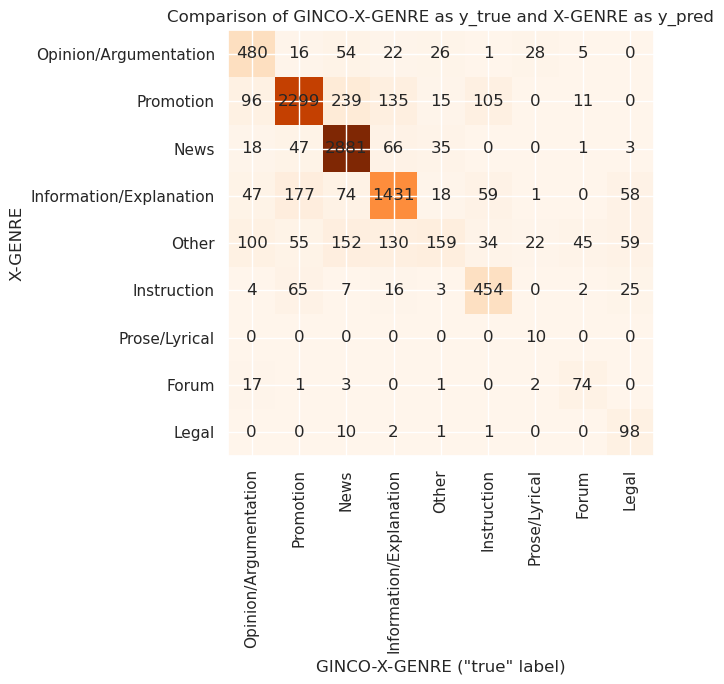

Comparison of classifiers: FTD-X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.53, Micro F1: 0.709
                         precision    recall  f1-score   support

              Promotion       0.92      0.61      0.73      4376
                   News       0.77      0.89      0.82      2644
Information/Explanation       0.67      0.65      0.66      1938
            Instruction       0.59      0.71      0.65       479
                  Legal       0.94      0.34      0.50       312
  Opinion/Argumentation       0.13      0.50      0.21       165
          Prose/Lyrical       0.70      0.08      0.15        86

              micro avg       0.74      0.68      0.71     10000
              macro avg       0.67      0.54      0.53     10000
           weighted avg       0.80      0.68      0.72     10000



<Figure size 700x500 with 0 Axes>

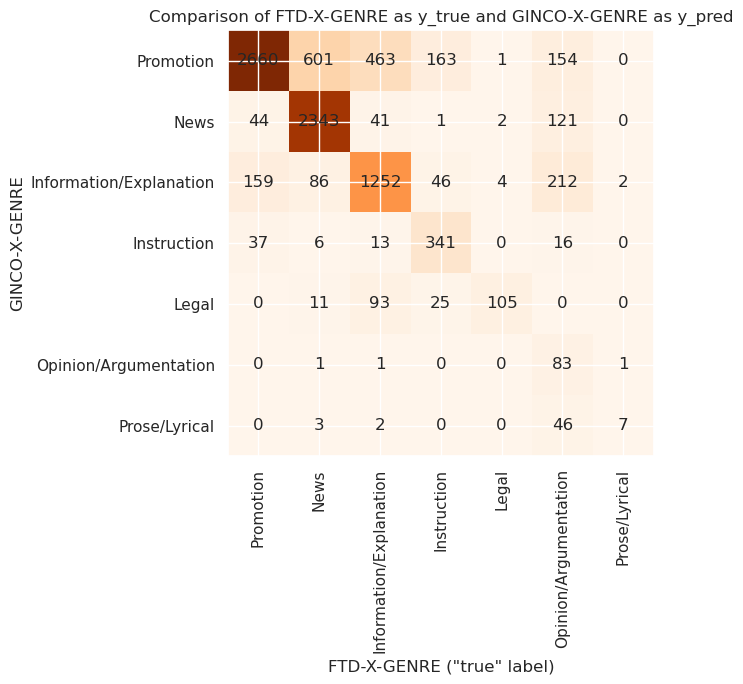

Comparison of classifiers: FTD-X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.336, Micro F1: 0.435


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.

                         precision    recall  f1-score   support

              Promotion       0.00      0.00      0.00      4376
                   News       0.74      0.86      0.79      2644
Information/Explanation       0.40      0.75      0.52      1938
            Instruction       0.30      0.80      0.43       479
                  Legal       0.00      0.00      0.00       312
  Opinion/Argumentation       0.04      0.33      0.08       165
          Prose/Lyrical       0.40      0.76      0.53        86

              micro avg       0.45      0.42      0.44     10000
              macro avg       0.27      0.50      0.34     10000
           weighted avg       0.29      0.42      0.34     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 700x500 with 0 Axes>

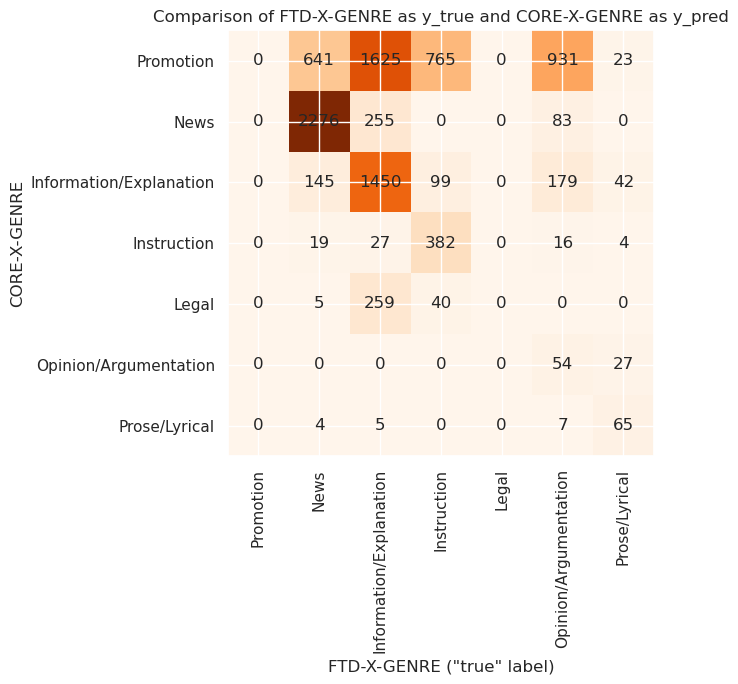

Comparison of classifiers: FTD-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.632, Micro F1: 0.713
                         precision    recall  f1-score   support

              Promotion       0.95      0.58      0.72      4376
                   News       0.71      0.92      0.80      2644
Information/Explanation       0.72      0.67      0.69      1938
            Instruction       0.59      0.81      0.69       479
                  Legal       0.83      0.65      0.73       312
  Opinion/Argumentation       0.12      0.57      0.20       165
          Prose/Lyrical       0.70      0.51      0.59        86

              micro avg       0.73      0.70      0.71     10000
              macro avg       0.66      0.67      0.63     10000
           weighted avg       0.81      0.70      0.73     10000



<Figure size 700x500 with 0 Axes>

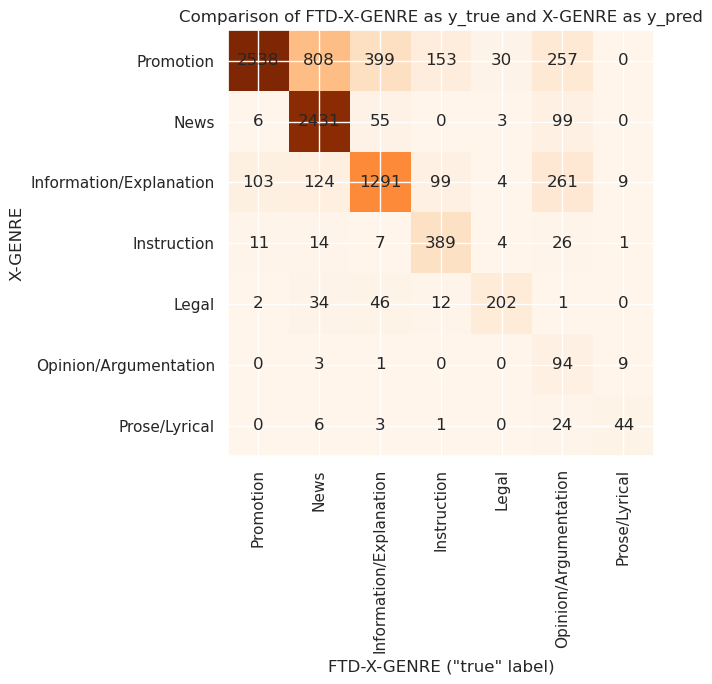

Comparison of classifiers: CORE-X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.299, Micro F1: 0.483


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

  Opinion/Argumentation       0.43      0.21      0.28      1270
              Promotion       0.00      0.00      0.00         0
                   News       0.79      0.78      0.78      3090
                  Other       0.08      0.44      0.14       142
Information/Explanation       0.82      0.42      0.56      3621
            Instruction       0.82      0.37      0.51      1286
                  Legal       0.00      0.00      0.00         0
          Prose/Lyrical       1.00      0.06      0.12       161
                  Forum       0.81      0.18      0.30       430

               accuracy                           0.48     10000
              macro avg       0.53      0.27      0.30     10000
           weighted avg       0.75      0.48      0.56     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 700x500 with 0 Axes>

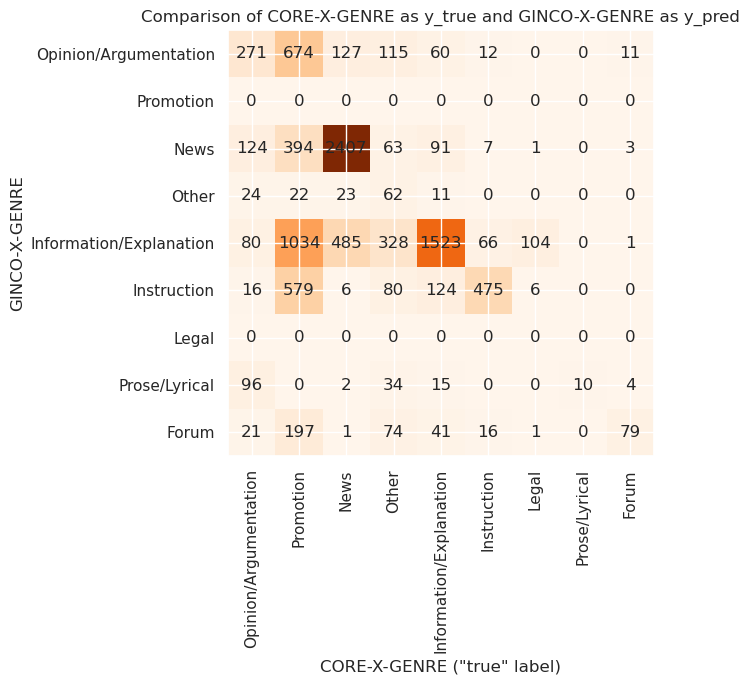

Comparison of classifiers: CORE-X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.336, Micro F1: 0.435


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

              Promotion       0.00      0.00      0.00         0
                   News       0.86      0.74      0.79      3090
Information/Explanation       0.75      0.40      0.52      3621
            Instruction       0.80      0.30      0.43      1286
                  Legal       0.00      0.00      0.00         0
  Opinion/Argumentation       0.33      0.04      0.08      1270
          Prose/Lyrical       0.76      0.40      0.53       161

              micro avg       0.42      0.45      0.44      9428
              macro avg       0.50      0.27      0.34      9428
           weighted avg       0.74      0.45      0.54      9428



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 700x500 with 0 Axes>

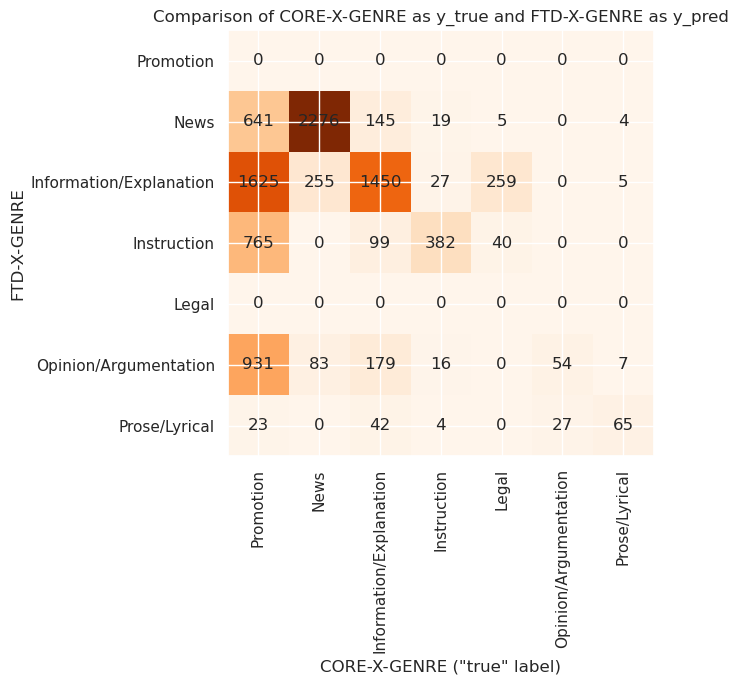

Comparison of classifiers: CORE-X-GENRE as y_true, X-GENRE as y_pred
Macro F1: 0.395, Micro F1: 0.531


/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/

                         precision    recall  f1-score   support

  Opinion/Argumentation       0.48      0.29      0.36      1270
              Promotion       0.00      0.00      0.00         0
                   News       0.76      0.85      0.80      3090
Information/Explanation       0.86      0.43      0.57      3621
                  Other       0.28      0.50      0.35       142
            Instruction       0.82      0.42      0.55      1286
          Prose/Lyrical       0.89      0.35      0.50       161
                  Forum       0.86      0.27      0.42       430
                  Legal       0.00      0.00      0.00         0

               accuracy                           0.53     10000
              macro avg       0.55      0.34      0.40     10000
           weighted avg       0.77      0.53      0.60     10000



/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 700x500 with 0 Axes>

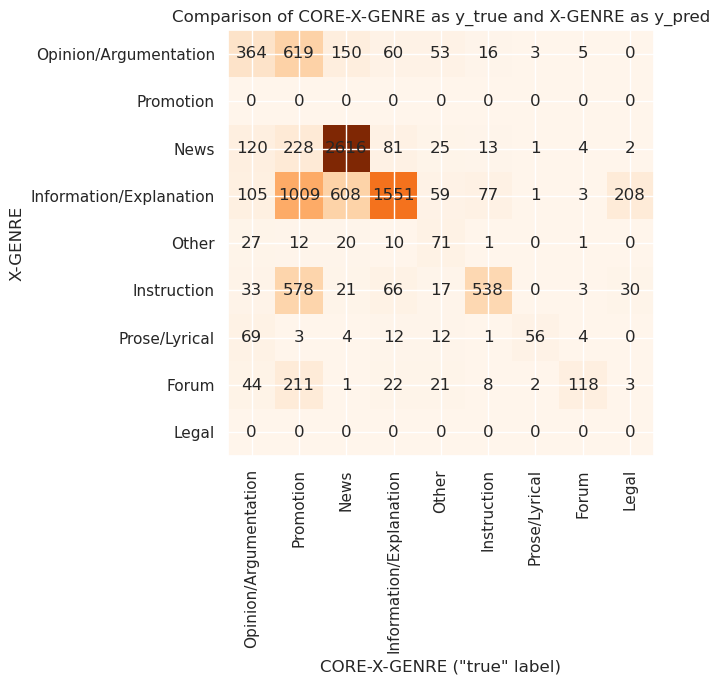

Comparison of classifiers: X-GENRE as y_true, GINCO-X-GENRE as y_pred
Macro F1: 0.632, Micro F1: 0.789
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.76      0.63      0.69       762
              Promotion       0.79      0.86      0.83      2660
                   News       0.94      0.84      0.89      3420
                  Other       0.21      0.62      0.31       258
Information/Explanation       0.77      0.79      0.78      1802
            Instruction       0.79      0.69      0.74       654
                  Legal       0.88      0.40      0.55       243
          Prose/Lyrical       1.00      0.16      0.27        63
                  Forum       0.76      0.54      0.63       138

               accuracy                           0.79     10000
              macro avg       0.77      0.62      0.63     10000
           weighted avg       0.82      0.79      0.80     10000



<Figure size 700x500 with 0 Axes>

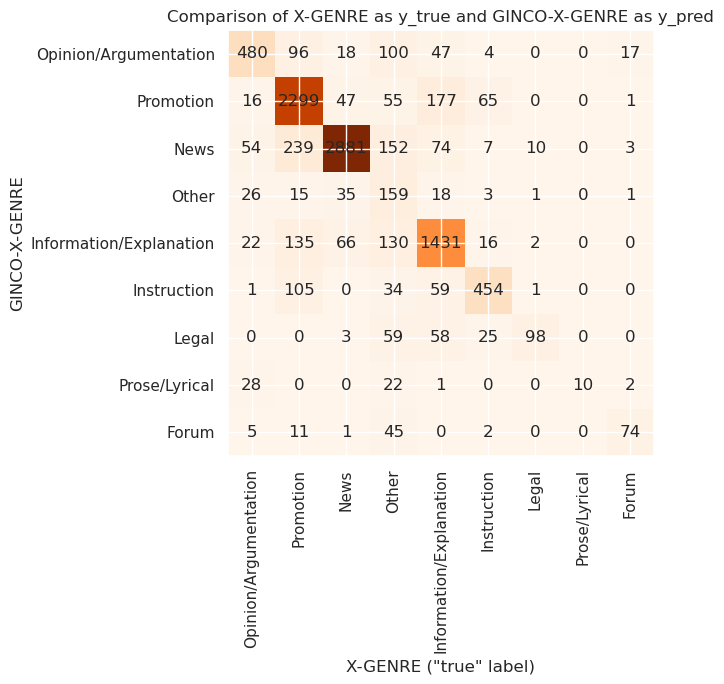

Comparison of classifiers: X-GENRE as y_true, FTD-X-GENRE as y_pred
Macro F1: 0.632, Micro F1: 0.713
                         precision    recall  f1-score   support

              Promotion       0.58      0.95      0.72      2660
                   News       0.92      0.71      0.80      3420
Information/Explanation       0.67      0.72      0.69      1802
            Instruction       0.81      0.59      0.69       654
                  Legal       0.65      0.83      0.73       243
  Opinion/Argumentation       0.57      0.12      0.20       762
          Prose/Lyrical       0.51      0.70      0.59        63

              micro avg       0.70      0.73      0.71      9604
              macro avg       0.67      0.66      0.63      9604
           weighted avg       0.73      0.73      0.70      9604



<Figure size 700x500 with 0 Axes>

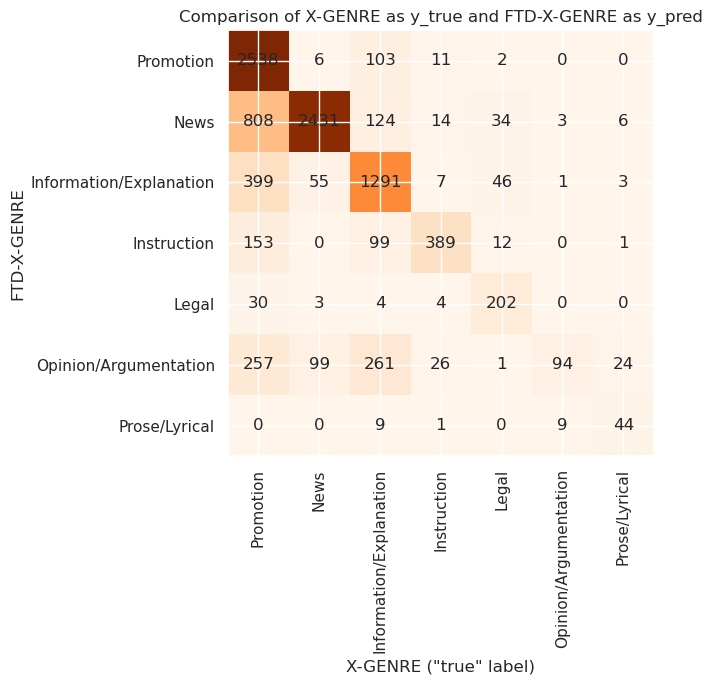

Comparison of classifiers: X-GENRE as y_true, CORE-X-GENRE as y_pred
Macro F1: 0.508, Micro F1: 0.622
                         precision    recall  f1-score   support

  Opinion/Argumentation       0.29      0.48      0.36       762
                   News       0.85      0.76      0.80      3420
Information/Explanation       0.43      0.86      0.57      1802
            Instruction       0.42      0.82      0.55       654
                  Forum       0.27      0.86      0.42       138
          Prose/Lyrical       0.35      0.89      0.50        63
                  Other       0.50      0.28      0.35       258

              micro avg       0.53      0.75      0.62      7097
              macro avg       0.44      0.71      0.51      7097
           weighted avg       0.61      0.75      0.65      7097



<Figure size 700x500 with 0 Axes>

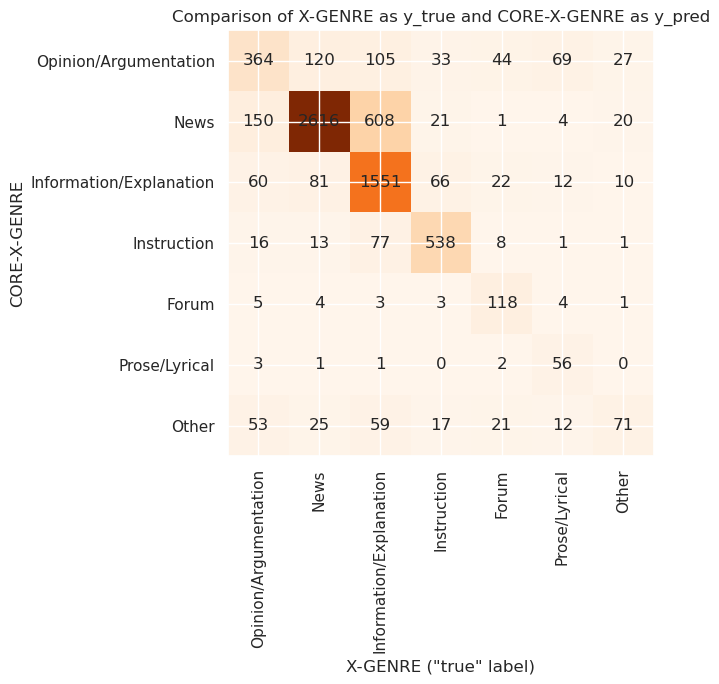

{'Classifier as y_true': ['GINCO-X-GENRE',
  'GINCO-X-GENRE',
  'GINCO-X-GENRE',
  'FTD-X-GENRE',
  'FTD-X-GENRE',
  'FTD-X-GENRE',
  'CORE-X-GENRE',
  'CORE-X-GENRE',
  'CORE-X-GENRE',
  'X-GENRE',
  'X-GENRE',
  'X-GENRE'],
 'Classifier as y_pred': ['FTD-X-GENRE',
  'CORE-X-GENRE',
  'X-GENRE',
  'GINCO-X-GENRE',
  'CORE-X-GENRE',
  'X-GENRE',
  'GINCO-X-GENRE',
  'FTD-X-GENRE',
  'X-GENRE',
  'GINCO-X-GENRE',
  'FTD-X-GENRE',
  'CORE-X-GENRE'],
 'Macro F1': [0.53,
  0.38,
  0.63,
  0.53,
  0.34,
  0.63,
  0.3,
  0.34,
  0.4,
  0.63,
  0.63,
  0.51],
 'Micro F1': [0.71,
  0.57,
  0.79,
  0.71,
  0.44,
  0.71,
  0.48,
  0.44,
  0.53,
  0.79,
  0.71,
  0.62],
 'Macro precision': [0.54,
  0.35,
  0.62,
  0.67,
  0.27,
  0.66,
  0.53,
  0.5,
  0.55,
  0.77,
  0.67,
  0.44],
 'Macro recall': [0.67,
  0.68,
  0.77,
  0.54,
  0.5,
  0.67,
  0.27,
  0.27,
  0.34,
  0.62,
  0.66,
  0.71]}

<Figure size 700x500 with 0 Axes>

In [68]:
results_dict_comparison= {"Classifier as y_true": [], "Classifier as y_pred": [], 'Macro F1': [], 'Micro F1': [], 'Macro precision': [], 'Macro recall': []}

for combination in x_genre_combinations:
	results_report = classifier_agreement(combination)
	results_dict_comparison["Classifier as y_true"].append(results_report["Classifier as y_true"])
	results_dict_comparison["Classifier as y_pred"].append(results_report["Classifier as y_pred"])
	results_dict_comparison['Macro F1'].append(results_report['Macro F1'])
	results_dict_comparison['Micro F1'].append(results_report['Micro F1'])
	results_dict_comparison['Macro precision'].append(results_report['Macro precision'])
	results_dict_comparison['Macro recall'].append(results_report['Macro recall'])

results_dict_comparison

In [69]:
# Create a dataframe with results
x_genre_comparison_df = pd.DataFrame(results_dict_comparison)
x_genre_comparison_df = x_genre_comparison_df.sort_values("Macro F1", ascending=False)

print(x_genre_comparison_df.to_markdown(index=False))

| Classifier as y_true   | Classifier as y_pred   |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:-----------------------|:-----------------------|-----------:|-----------:|------------------:|---------------:|
| GINCO-X-GENRE          | X-GENRE                |       0.63 |       0.79 |              0.62 |           0.77 |
| FTD-X-GENRE            | X-GENRE                |       0.63 |       0.71 |              0.66 |           0.67 |
| X-GENRE                | GINCO-X-GENRE          |       0.63 |       0.79 |              0.77 |           0.62 |
| X-GENRE                | FTD-X-GENRE            |       0.63 |       0.71 |              0.67 |           0.66 |
| GINCO-X-GENRE          | FTD-X-GENRE            |       0.53 |       0.71 |              0.54 |           0.67 |
| FTD-X-GENRE            | GINCO-X-GENRE          |       0.53 |       0.71 |              0.67 |           0.54 |
| X-GENRE                | CORE-X-GENRE           |       0.51 |       0.62 |   

# Analysis of which labels often occur together

I had another idea that we could analyse which labels occur together using the apriori algorithm which is used in association rule learning.

Main concepts:

- Support: It measures the number of times a particular item or combination of items occur in a dataset out of the number of all instances.
`Support(pair) = frequency_of_pair/no_of_instances`

- Confidence: It measures how likely the pair will occur given they the left value has been predicted - number of times both have been predicted together divided by a number of time the left value has been predicted (-> if the left value occurs very often, the confidence will be smaller)
`Confidence(pair (based of occurrence of left value)) = frequency_of_pair/frequency of left value`

- Lift: A lift is a metric that determines the strength of association between the best rules. It is obtained by taking confidence (based on the frequency of the left value and right value) dand diving it with support (for right value). 
`Lift(pair (based on occurrence of left value)) = Confidence(based on occurrence of left value)/Support(right value)}`

This means that if left value is very frequent -> confidence is smaller, if the pair does not occur together very often, it won't reach the confidence limit. The frequency of right value does not impact the confidence, but it does impact the lift. For the same number of occurences of the pair, the lift is higher if one of them is infrequent than if both were frequent. The bigger support (frequency of the pair occuring together), the bigger is lift.

two most frequent values, always occurring together:
left = 7
right = 7

occur = 7/10
total = 10

confidence = 7/10 / 7/10 = 1

support = 7/10

lift = 1 / 0.7 = 1.42

-----------
two not so frequent values always occurring together:

left = 4
right = 4

occur = 4/10

confidence = 1

support = 0.4

lift = 1/0.4 = 2.5

In [70]:
# We will compare schemata in pairs

# putting the apriori output into a pandas dataframe
def inspect(output):
    lhs         = [list(result[2][0][0]) for result in output]
    rhs         = [list(result[2][0][1]) for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    entire_item = [list(result) for result in output]
    final_lhs = []
    final_rhs = []

    for item in lhs:
        if len(item) > 0:
            final_lhs.append(item[0])
        else:
            final_lhs.append(0)

    for item in rhs:
        if len(item) > 0:
            final_rhs.append(item[0])
        else:
            final_rhs.append(0)
    return list(zip(final_lhs, final_rhs, support, confidence, lift, entire_item))


def compare_with_apriori(dataframe, column1, column2):
	apriori_list =  list(list(x) for x in zip(list(dataframe[column1]), list(dataframe[column2])))

	results = list(apriori(apriori_list,
             min_support=0.01,
             min_confidence=0.50,
             min_lift=1.0,
             max_length=None))

	output_df = pd.DataFrame(inspect(list(results)), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift','Full_result'])

	output_df = output_df.sort_values(by="Lift", ascending=False)

	# Filter out values with 0 at lhs or rhs
	output_df = output_df[output_df["Left_Hand_Side"] != 0]
	output_df = output_df[output_df["Right_Hand_Side"] != 0]

	return output_df

In [71]:
# Let's use only the relevant columns
corpus_small = corpus[['FTD', 'GINCO','CORE','GINCO-X-GENRE','FTD-X-GENRE', 'CORE-X-GENRE', 'X-GENRE']]

corpus_small.head(1)

,FTD,GINCO,CORE,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE
0,A17 (review),List of Summaries/Excerpts,Opinion,Opinion/Argumentation,Promotion,Opinion/Argumentation,Opinion/Argumentation


In [72]:
# Add information about columns to the label names
for i in classifiers:
	corpus_small[i] = f"{i}: " + corpus_small[i].astype(str)

corpus_small.head(4)

/tmp/ipykernel_4915/3324441330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_small[i] = f"{i}: " + corpus_small[i].astype(str)


,FTD,GINCO,CORE,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE
0,FTD: A17 (review),GINCO: List of Summaries/Excerpts,CORE: Opinion,GINCO-X-GENRE: Opinion/Argumentation,FTD-X-GENRE: Promotion,CORE-X-GENRE: Opinion/Argumentation,X-GENRE: Opinion/Argumentation
1,FTD: A12 (promotion),GINCO: List of Summaries/Excerpts,CORE: Informational Description/Explanation,GINCO-X-GENRE: Promotion,FTD-X-GENRE: Promotion,CORE-X-GENRE: News,X-GENRE: Promotion
2,FTD: A12 (promotion),GINCO: Promotion,CORE: Informational Description/Explanation,GINCO-X-GENRE: Promotion,FTD-X-GENRE: Promotion,CORE-X-GENRE: Information/Explanation,X-GENRE: Promotion
3,FTD: A1 (argumentative),GINCO: List of Summaries/Excerpts,CORE: Narrative,GINCO-X-GENRE: News,FTD-X-GENRE: News,CORE-X-GENRE: News,X-GENRE: News


In [73]:
# Let's compare with apriori

for i in classifiers:
	for i2 in classifiers:
		if i != i2:
			print(f"Comparison: {i} with {i2}")
			df = compare_with_apriori(corpus_small, i, i2).drop(columns="Full_result")
			print(df.to_markdown(index = False))

			# Calculate which labels are missing
			not_matched = []

			for label in list(corpus_small[i].unique()):
				if label not in list(df["Left_Hand_Side"].unique()) and label not in list(df["Right_Hand_Side"].unique()):
					not_matched.append(label)
			for label in list(corpus_small[i2].unique()):
				if label not in list(df["Left_Hand_Side"].unique()) and label not in list(df["Right_Hand_Side"].unique()):
					not_matched.append(label)
			print(f"Labels not matched: {not_matched}")


Comparison: FTD with GINCO
| Left_Hand_Side         | Right_Hand_Side                |   Support |   Confidence |     Lift |
|:-----------------------|:-------------------------------|----------:|-------------:|---------:|
| FTD: A7 (instruction)  | GINCO: Instruction             |    0.0313 |     0.700224 | 14.3488  |
| FTD: A16 (information) | GINCO: Information/Explanation |    0.0898 |     0.748957 |  4.22662 |
| FTD: A8 (news)         | GINCO: News/Reporting          |    0.1649 |     0.837056 |  2.66918 |
| FTD: A12 (promotion)   | GINCO: Promotion               |    0.2297 |     0.54354  |  2.22854 |
Labels not matched: ['FTD: A17 (review)', 'FTD: A1 (argumentative)', 'FTD: A14 (academic)', 'FTD: A9 (legal)', 'FTD: A11 (personal)', 'FTD: A4 (fiction)', 'GINCO: List of Summaries/Excerpts', 'GINCO: Other', 'GINCO: Opinion/Argumentation', 'GINCO: Legal/Regulation', 'GINCO: Forum']
Comparison: FTD with CORE
| Left_Hand_Side                              | Right_Hand_Side             

In [61]:
# Let's print out the label names for each classifier
for classifier in classifiers:
	print(classifier)
	print(list(corpus_small[classifier].unique()))

FTD
['FTD: A12 (promotion)', 'FTD: A1 (argumentative)', 'FTD: A7 (instruction)', 'FTD: A16 (information)', 'FTD: A8 (news)', 'FTD: A17 (review)', 'FTD: A11 (personal)', 'FTD: A9 (legal)', 'FTD: A14 (academic)', 'FTD: A4 (fiction)']
GINCO
['GINCO: Promotion', 'GINCO: List of Summaries/Excerpts', 'GINCO: News/Reporting', 'GINCO: Other', 'GINCO: Information/Explanation', 'GINCO: Opinion/Argumentation', 'GINCO: Instruction', 'GINCO: Legal/Regulation', 'GINCO: Forum']
CORE
['CORE: Informational Description/Explanation', 'CORE: Informational Persuasion', 'CORE: Opinion', 'CORE: Narrative', 'CORE: Spoken', 'CORE: How-To/Instructional', 'CORE: Interactive Discussion', 'CORE: Lyrical']
GINCO-X-GENRE
['GINCO-X-GENRE: Promotion', 'GINCO-X-GENRE: News', 'GINCO-X-GENRE: Other', 'GINCO-X-GENRE: Information/Explanation', 'GINCO-X-GENRE: Opinion/Argumentation', 'GINCO-X-GENRE: Instruction', 'GINCO-X-GENRE: Legal', 'GINCO-X-GENRE: Forum', 'GINCO-X-GENRE: Prose/Lyrical']
FTD-X-GENRE
['FTD-X-GENRE: Promo